In [1]:
import pandas as pd

# Read the data file
df = pd.read_csv('./crx.data', header=None, na_values="?")

# # Preview the data
# print(df.head())
# print(df)

# Assign columns A1 to A16
df.columns = [f"A{i+1}" for i in range(df.shape[1])]

# Rename the last column to 'A16 (Class)'
df.rename(columns={"A16": "A16 (Class)"}, inplace=True)

# # Preview data again
# print(df.head())

# Print value counts ONLY for categorical (string/object) columns
print("value counts for categorical (object) columns:")
categorical_preview_cols = df.select_dtypes(include=['object']).columns.tolist()

for col in categorical_preview_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts(dropna=False))

## NOTE: we have no t's for A4 because they were probably MISSING values

# Strip and map only valid class values and map +/- into 1/0
df["A16 (Class)"] = df["A16 (Class)"].astype(str).str.strip().map({'+': 1, '-': 0})


print("\n",df.shape[0], "rows ×", df.shape[1], "columns")

df.head()


value counts for categorical (object) columns:

Column: A1
A1
b      468
a      210
NaN     12
Name: count, dtype: int64

Column: A4
A4
u      519
y      163
NaN      6
l        2
Name: count, dtype: int64

Column: A5
A5
g      519
p      163
NaN      6
gg       2
Name: count, dtype: int64

Column: A6
A6
c      137
q       78
w       64
i       59
aa      54
ff      53
k       51
cc      41
m       38
x       38
d       30
e       25
j       10
NaN      9
r        3
Name: count, dtype: int64

Column: A7
A7
v      399
h      138
bb      59
ff      57
NaN      9
j        8
z        8
dd       6
n        4
o        2
Name: count, dtype: int64

Column: A9
A9
t    361
f    329
Name: count, dtype: int64

Column: A10
A10
f    395
t    295
Name: count, dtype: int64

Column: A12
A12
f    374
t    316
Name: count, dtype: int64

Column: A13
A13
g    625
s     57
p      8
Name: count, dtype: int64

Column: A16 (Class)
A16 (Class)
-    383
+    307
Name: count, dtype: int64

 690 rows × 16 columns


A1     A2     A3 A4 A5 A6 A7    A8 A9 A10  A11 A12 A13    A14  A15  \
0  b  30.83  0.000  u  g  w  v  1.25  t   t    1   f   g  202.0    0   
1  a  58.67  4.460  u  g  q  h  3.04  t   t    6   f   g   43.0  560   
2  a  24.50  0.500  u  g  q  h  1.50  t   f    0   f   g  280.0  824   
3  b  27.83  1.540  u  g  w  v  3.75  t   t    5   t   g  100.0    3   
4  b  20.17  5.625  u  g  w  v  1.71  t   f    0   f   s  120.0    0   

   A16 (Class)  
0            1  
1            1  
2            1  
3            1  
4            1

In [2]:
# Check for missing values
print(df.isna().sum())


A1             12
A2             12
A3              0
A4              6
A5              6
A6              9
A7              9
A8              0
A9              0
A10             0
A11             0
A12             0
A13             0
A14            13
A15             0
A16 (Class)     0
dtype: int64


In [3]:


# we only lose at most 13 out of 690 rows (about ~2%), so we drop them


df_clean = df.dropna()

df_clean.head()

A1     A2     A3 A4 A5 A6 A7    A8 A9 A10  A11 A12 A13    A14  A15  \
0  b  30.83  0.000  u  g  w  v  1.25  t   t    1   f   g  202.0    0   
1  a  58.67  4.460  u  g  q  h  3.04  t   t    6   f   g   43.0  560   
2  a  24.50  0.500  u  g  q  h  1.50  t   f    0   f   g  280.0  824   
3  b  27.83  1.540  u  g  w  v  3.75  t   t    5   t   g  100.0    3   
4  b  20.17  5.625  u  g  w  v  1.71  t   f    0   f   s  120.0    0   

   A16 (Class)  
0            1  
1            1  
2            1  
3            1  
4            1

In [4]:
df = df_clean  # overwrite original df
print("\n",df.shape[0], "rows ×", df.shape[1], "columns")
df.head()


 653 rows × 16 columns


A1     A2     A3 A4 A5 A6 A7    A8 A9 A10  A11 A12 A13    A14  A15  \
0  b  30.83  0.000  u  g  w  v  1.25  t   t    1   f   g  202.0    0   
1  a  58.67  4.460  u  g  q  h  3.04  t   t    6   f   g   43.0  560   
2  a  24.50  0.500  u  g  q  h  1.50  t   f    0   f   g  280.0  824   
3  b  27.83  1.540  u  g  w  v  3.75  t   t    5   t   g  100.0    3   
4  b  20.17  5.625  u  g  w  v  1.71  t   f    0   f   s  120.0    0   

   A16 (Class)  
0            1  
1            1  
2            1  
3            1  
4            1

In [5]:
# Find columns with categorical or non-numeric data types
categorical_cols = df.select_dtypes(include="object").columns.tolist()

# print("Categorical columns:", categorical_cols)

# for col in categorical_cols:
#     df[col] = pd.Categorical(df[col])  # Ensures pandas tracks all categories

# One hot encoding, turning categoricals into multiple columns based on their respective non-numeric values and outputting True or False

# print(pd.get_dummies(df, columns=['A1']))

# df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# # print(df.columns, '\n\n')

# print(df["A4"].value_counts())


# One-hot encode all categorical columns, no dropping columns to avoid collinearity as of yet
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=False)
print(df_encoded.columns)
## NOTE: A4_t must've been removed doing to missing values

print("\n",df_encoded.shape[0], "rows ×", df_encoded.shape[1], "columns")


df_encoded.head()

Index(['A2', 'A3', 'A8', 'A11', 'A14', 'A15', 'A16 (Class)', 'A1_a', 'A1_b',
       'A4_l', 'A4_u', 'A4_y', 'A5_g', 'A5_gg', 'A5_p', 'A6_aa', 'A6_c',
       'A6_cc', 'A6_d', 'A6_e', 'A6_ff', 'A6_i', 'A6_j', 'A6_k', 'A6_m',
       'A6_q', 'A6_r', 'A6_w', 'A6_x', 'A7_bb', 'A7_dd', 'A7_ff', 'A7_h',
       'A7_j', 'A7_n', 'A7_o', 'A7_v', 'A7_z', 'A9_f', 'A9_t', 'A10_f',
       'A10_t', 'A12_f', 'A12_t', 'A13_g', 'A13_p', 'A13_s'],
      dtype='object')

 653 rows × 47 columns


A2     A3    A8  A11    A14  A15  A16 (Class)   A1_a   A1_b   A4_l  ...  \
0  30.83  0.000  1.25    1  202.0    0            1  False   True  False  ...   
1  58.67  4.460  3.04    6   43.0  560            1   True  False  False  ...   
2  24.50  0.500  1.50    0  280.0  824            1   True  False  False  ...   
3  27.83  1.540  3.75    5  100.0    3            1  False   True  False  ...   
4  20.17  5.625  1.71    0  120.0    0            1  False   True  False  ...   

    A7_z   A9_f  A9_t  A10_f  A10_t  A12_f  A12_t  A13_g  A13_p  A13_s  
0  False  False  True  False   True   True  False   True  False  False  
1  False  False  True  False   True   True  False   True  False  False  
2  False  False  True   True  False   True  False   True  False  False  
3  False  False  True  False   True  False   True   True  False  False  
4  False  False  True   True  False   True  False  False  False   True  

[5 rows x 47 columns]

In [6]:
# import pandas as pd

# # Assume df is your cleaned, no-NaN dataset with A1–A15 and 'A16 (Class)'

# # Step 1: Find categorical columns (type 'object')
# categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# # Step 2: Convert each to Categorical to retain observed categories
# for col in categorical_cols:
#     df[col] = pd.Categorical(df[col])

# # Step 3: One-hot encode with all categories (no drop)
# df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=False)

# df_encoded

In [7]:
# print("Original columns:", df.columns)
# print("Encoded columns:", df_encoded.columns)


Epoch 1/20
22/22 [==============================] - 0s 6ms/step - loss: 0.8254 - accuracy: 0.4257 - val_loss: 0.6822 - val_accuracy: 0.5800
Epoch 2/20
22/22 [==============================] - 0s 1ms/step - loss: 0.6371 - accuracy: 0.6557 - val_loss: 0.5662 - val_accuracy: 0.7900
Epoch 3/20
22/22 [==============================] - 0s 1ms/step - loss: 0.5287 - accuracy: 0.8186 - val_loss: 0.4855 - val_accuracy: 0.8300
Epoch 4/20
22/22 [==============================] - 0s 1ms/step - loss: 0.4516 - accuracy: 0.8471 - val_loss: 0.4292 - val_accuracy: 0.8433
Epoch 5/20
22/22 [==============================] - 0s 1ms/step - loss: 0.3984 - accuracy: 0.8557 - val_loss: 0.3939 - val_accuracy: 0.8467
Epoch 6/20
22/22 [==============================] - 0s 1ms/step - loss: 0.3618 - accuracy: 0.8643 - val_loss: 0.3725 - val_accuracy: 0.8467
Epoch 7/20
22/22 [==============================] - 0s 1ms/step - loss: 0.3391 - accuracy: 0.8714 - val_loss: 0.3613 - val_accuracy: 0.8467
Epoch 8/20
22/22 [==

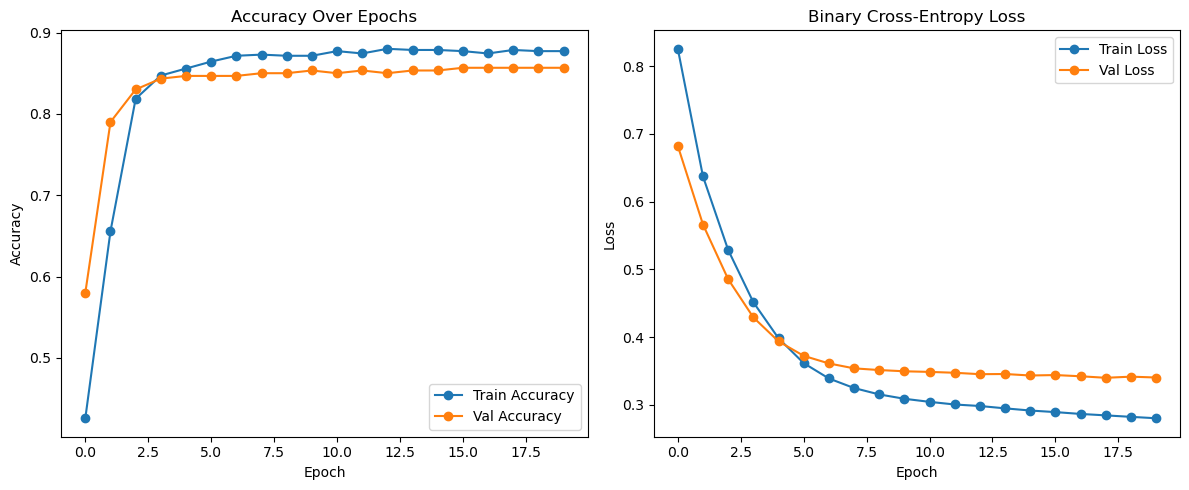

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Step 1: Generate dummy binary classification data
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

# Step 2: Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Define a simple neural network
model = Sequential([
    Dense(32, activation='relu', input_shape=(X.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Output probability for binary classification
])

# Step 4: Compile with binary_crossentropy (i.e., log loss)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Step 5: Train and save history
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Step 6: Plot training vs validation accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
plt.title('Binary Cross-Entropy Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [9]:
from sklearn.ensemble import RandomForestClassifier

X = df_encoded.drop("A16 (Class)", axis=1)
y = df_encoded["A16 (Class)"]

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Get top features
importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False)
print(top_features.head(10), '\n')

# # top 2 predictive features to use for our 2D classification model
# top_features = top_importances.head(2)
# print(top_features)


# Filter out dummy variables from same original group (e.g. avoid A9_f and A9_t together)
for i in range(len(top_features)):
    for j in range(i + 1, len(top_features)):
        f1 = top_features.index[i]
        f2 = top_features.index[j]
        if f1.split('_')[0] != f2.split('_')[0]:  # not from same original column
            print(f"Using features: {f1}, {f2}")
            break
    break

A9_f     0.189223
A9_t     0.147181
A8       0.081950
A11      0.080041
A3       0.063200
A14      0.060265
A15      0.060178
A2       0.053778
A10_t    0.041591
A10_f    0.035312
dtype: float64 

Using features: A9_f, A8


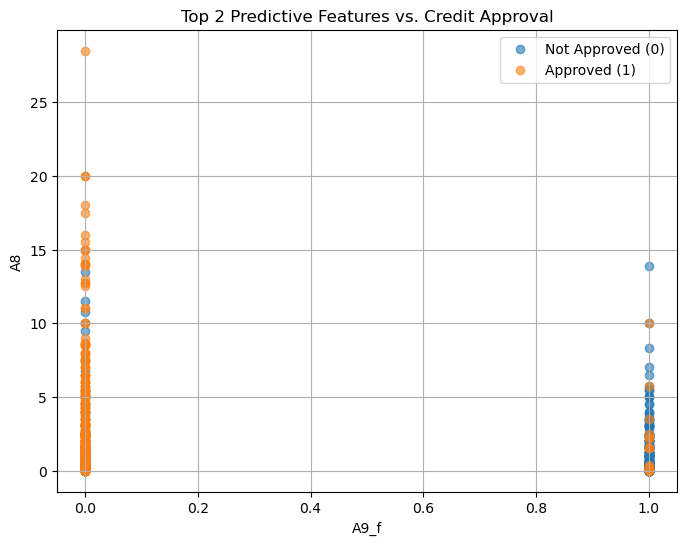

In [10]:
# Step 4: Scatter plot of the two features, colored by class
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][f1], X[y == 0][f2], label='Not Approved (0)', alpha=0.6)
plt.scatter(X[y == 1][f1], X[y == 1][f2], label='Approved (1)', alpha=0.6)
plt.xlabel(f1)
plt.ylabel(f2)
plt.title('Top 2 Predictive Features vs. Credit Approval')
plt.legend()
plt.grid(True)
plt.show()



Epoch 1/20
15/15 [==============================] - 0s 6ms/step - loss: 28.0632 - accuracy: 0.4376 - val_loss: 20.1059 - val_accuracy: 0.4286
Epoch 2/20
15/15 [==============================] - 0s 2ms/step - loss: 15.1503 - accuracy: 0.4617 - val_loss: 8.7991 - val_accuracy: 0.4337
Epoch 3/20
15/15 [==============================] - 0s 2ms/step - loss: 5.0137 - accuracy: 0.4333 - val_loss: 1.3460 - val_accuracy: 0.6684
Epoch 4/20
15/15 [==============================] - 0s 2ms/step - loss: 2.0202 - accuracy: 0.6236 - val_loss: 1.7200 - val_accuracy: 0.6429
Epoch 5/20
15/15 [==============================] - 0s 2ms/step - loss: 1.3946 - accuracy: 0.6521 - val_loss: 1.2287 - val_accuracy: 0.5918
Epoch 6/20
15/15 [==============================] - 0s 2ms/step - loss: 1.1066 - accuracy: 0.5974 - val_loss: 0.9635 - val_accuracy: 0.6582
Epoch 7/20
15/15 [==============================] - 0s 2ms/step - loss: 0.9826 - accuracy: 0.6477 - val_loss: 0.9627 - val_accuracy: 0.6684
Epoch 8/20
15/15 

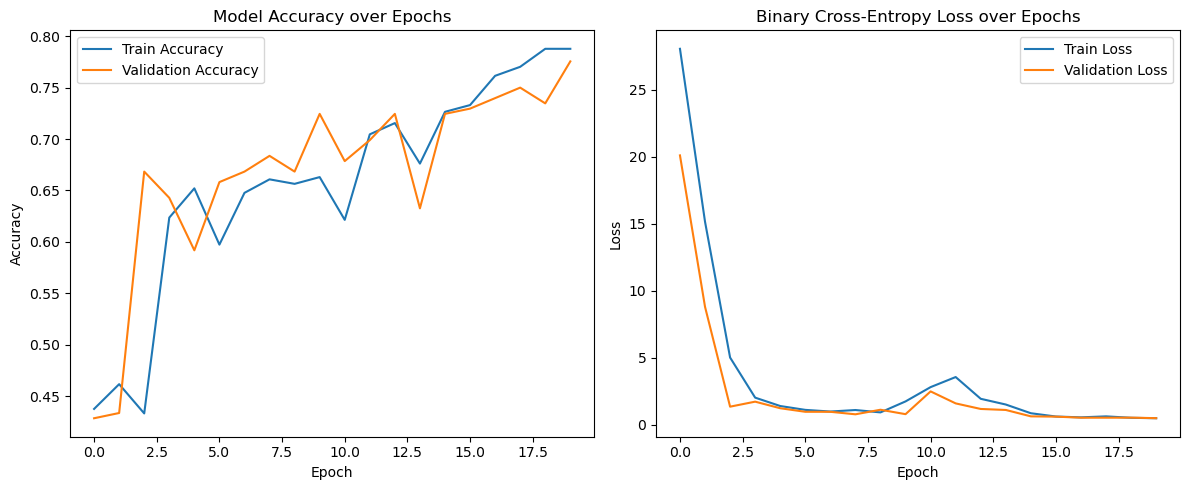

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Step 5: Convert data to float32 for TensorFlow
X_np = X.values.astype(np.float32)
y_np = y.values.astype(np.float32)

# Step 6: Build and compile the neural network
model = Sequential([
    Dense(32, activation='relu', input_shape=(X.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Step 7: Train the model
history = model.fit(X_np, y_np, validation_split=0.3, epochs=20, batch_size=32)

# Step 8: Plot accuracy and loss curves
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Binary Cross-Entropy Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


✅ Logistic Regression Accuracy: 0.7458
📉 Logistic Regression Log Loss: 0.5499


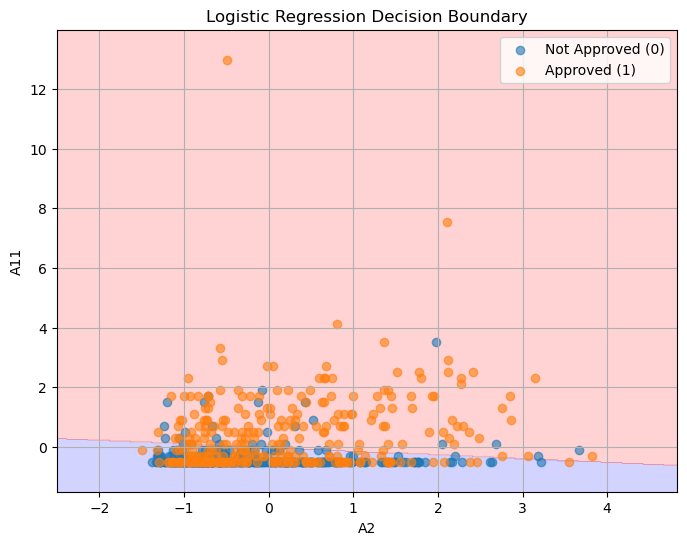

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, log_loss
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Select 2 good features (preferably numeric/continuous)
top_features = ['A2', 'A11']  # You can replace this with any 2 numeric columns

X_2d = df_encoded[top_features].values.astype(np.float32)
y = df_encoded["A16 (Class)"].values.astype(int)

# Step 2: Standardize features for smoother decision boundary
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_2d)

# Step 3: Train logistic regression
clf = LogisticRegression()
clf.fit(X_scaled, y)

# Step 4: Predict and evaluate
y_pred = clf.predict(X_scaled)
y_prob = clf.predict_proba(X_scaled)

acc = accuracy_score(y, y_pred)
loss = log_loss(y, y_prob)

print(f"\n✅ Logistic Regression Accuracy: {acc:.4f}")
print(f"📉 Logistic Regression Log Loss: {loss:.4f}")

# Step 5: Plot decision boundary
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

grid = np.c_[xx.ravel(), yy.ravel()]
Z = clf.predict(grid).reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.2, cmap='bwr')
plt.scatter(X_scaled[y == 0, 0], X_scaled[y == 0, 1], label='Not Approved (0)', alpha=0.6)
plt.scatter(X_scaled[y == 1, 0], X_scaled[y == 1, 1], label='Approved (1)', alpha=0.6)
plt.xlabel(top_features[0])
plt.ylabel(top_features[1])
plt.title('Logistic Regression Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.preprocessing import StandardScaler
import numpy as np

# Step 1: Select 2 features
top_features = ['A2', 'A11']
X_2d = df_encoded[top_features].values.astype(np.float32)
y = df_encoded["A16 (Class)"].values.astype(int)

# Step 2: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_2d)

# Step 3: Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_scaled, y)

y_pred_log = log_reg.predict(X_scaled)
y_proba_log = log_reg.predict_proba(X_scaled)

acc_log = accuracy_score(y, y_pred_log)
loss_log = log_loss(y, y_proba_log)

# Step 4: Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_scaled, y)

y_pred_rf = rf_clf.predict(X_scaled)
y_proba_rf = rf_clf.predict_proba(X_scaled)

acc_rf = accuracy_score(y, y_pred_rf)
loss_rf = log_loss(y, y_proba_rf)

# Step 5: Print comparison
print("📊 Model Comparison (using features: A2, A11)")
print(f"🔵 Logistic Regression Accuracy:     {acc_log:.4f}")
print(f"🔵 Logistic Regression Log Loss:     {loss_log:.4f}")
print(f"🌲 Random Forest Accuracy:           {acc_rf:.4f}")
print(f"🌲 Random Forest Log Loss:           {loss_rf:.4f}")


📊 Model Comparison (using features: A2, A11)
🔵 Logistic Regression Accuracy:     0.7458
🔵 Logistic Regression Log Loss:     0.5499
🌲 Random Forest Accuracy:           0.9464
🌲 Random Forest Log Loss:           0.1916


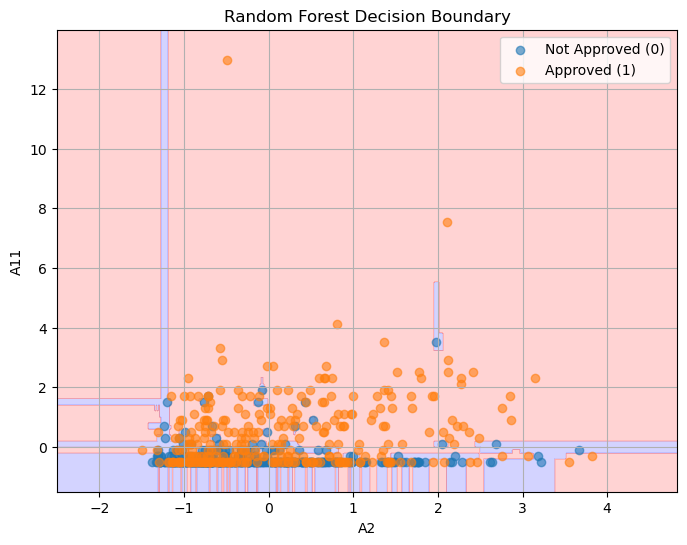

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Step 1: Choose same two numeric features (or try different ones)
top_features = ['A2', 'A11']
X_2d = df_encoded[top_features].values.astype(np.float32)
y = df_encoded["A16 (Class)"].values.astype(int)

# Step 2: Standardize for smoother visualization (RF doesn't need this to train)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_2d)

# Step 3: Train random forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_scaled, y)

# Step 4: Plot decision boundary
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

grid = np.c_[xx.ravel(), yy.ravel()]
Z = rf_clf.predict(grid).reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.2, cmap='bwr')
plt.scatter(X_scaled[y == 0, 0], X_scaled[y == 0, 1], label='Not Approved (0)', alpha=0.6)
plt.scatter(X_scaled[y == 1, 0], X_scaled[y == 1, 1], label='Approved (1)', alpha=0.6)
plt.xlabel(top_features[0])
plt.ylabel(top_features[1])
plt.title('Random Forest Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()


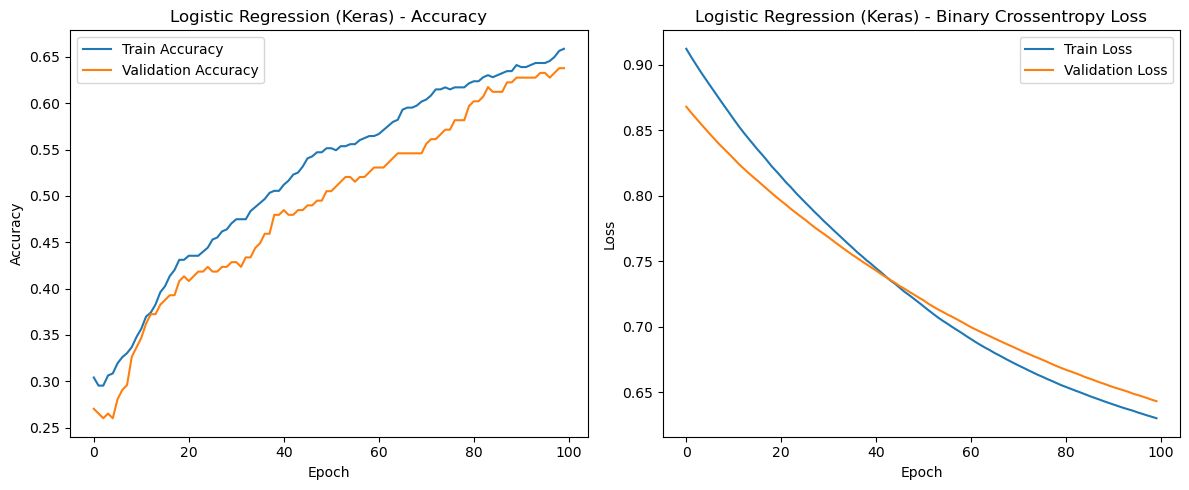

In [15]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Step 1: Prepare data (same two features, scaled)
X_2d = df_encoded[["A2", "A11"]].values.astype(np.float32)
y = df_encoded["A16 (Class)"].values.astype(np.float32)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_2d)

# Step 2: Build logistic regression model (Keras = 1-layer NN)
model = Sequential([
    Dense(1, activation='sigmoid', input_shape=(2,))
])

# model = Sequential([
#     Dense(8, activation='relu', input_shape=(2,)),  # NEW hidden layer
#     Dense(1, activation='sigmoid')
# ])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Step 3: Train the model
history = model.fit(X_scaled, y, validation_split=0.3, epochs=100, batch_size=32, verbose=0)

# Step 4: Plot training and validation accuracy/loss
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Logistic Regression (Keras) - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Logistic Regression (Keras) - Binary Crossentropy Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


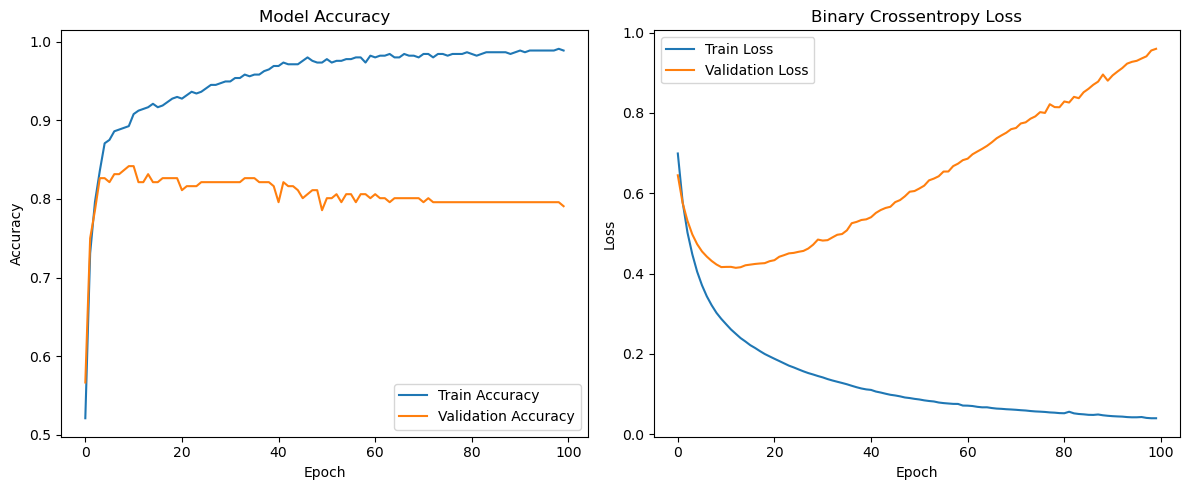

In [16]:
X_full = df_encoded.drop("A16 (Class)", axis=1)
y_full = df_encoded["A16 (Class)"].astype(np.float32)

# Scale full features
scaler = StandardScaler()
X_scaled_full = scaler.fit_transform(X_full.values.astype(np.float32))


model = Sequential([
    Dense(32, activation='relu', input_shape=(X_scaled_full.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_scaled_full, y_full, validation_split=0.3, epochs=100, batch_size=32, verbose = 0)

# Plot accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Binary Crossentropy Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, log_loss

# Features and target
X = df_encoded.drop("A16 (Class)", axis=1)
y = df_encoded["A16 (Class)"]

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train logistic regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_scaled, y)

# Predict
y_pred = log_reg.predict(X_scaled)
y_prob = log_reg.predict_proba(X_scaled)

# Evaluate
acc = accuracy_score(y, y_pred)
loss = log_loss(y, y_prob)

print(f"🔵 Logistic Regression Accuracy (Train): {acc:.4f}")
print(f"📉 Logistic Regression Log Loss (Train): {loss:.4f}")


🔵 Logistic Regression Accuracy (Train): 0.8913
📉 Logistic Regression Log Loss (Train): 0.2809


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

log_reg.fit(X_train, y_train)

y_pred_val = log_reg.predict(X_val)
y_proba_val = log_reg.predict_proba(X_val)

val_acc = accuracy_score(y_val, y_pred_val)
val_loss = log_loss(y_val, y_proba_val)

print(f"🔍 Logistic Regression Validation Accuracy: {val_acc:.4f}")
print(f"📉 Logistic Regression Validation Log Loss: {val_loss:.4f}")


🔍 Logistic Regression Validation Accuracy: 0.8520
📉 Logistic Regression Validation Log Loss: 0.3778


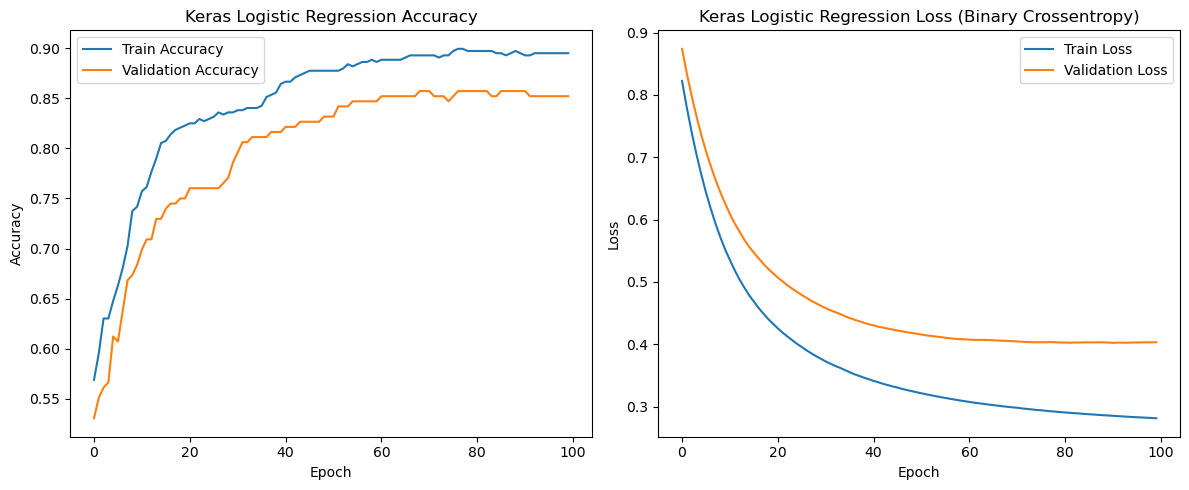

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Load and preprocess your data
X = df_encoded.drop("A16 (Class)", axis=1).values.astype(np.float32)
y = df_encoded["A16 (Class)"].values.astype(np.float32)

# Step 2: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Train/validation split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Step 4: Define logistic regression model (1-layer, sigmoid output)
model = Sequential([
    Dense(1, activation='sigmoid', input_shape=(X_train.shape[1],))
])

# Step 5: Compile model with binary cross-entropy loss
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Step 6: Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32, verbose=0)

# Step 7: Plot accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Keras Logistic Regression Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Keras Logistic Regression Loss (Binary Crossentropy)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


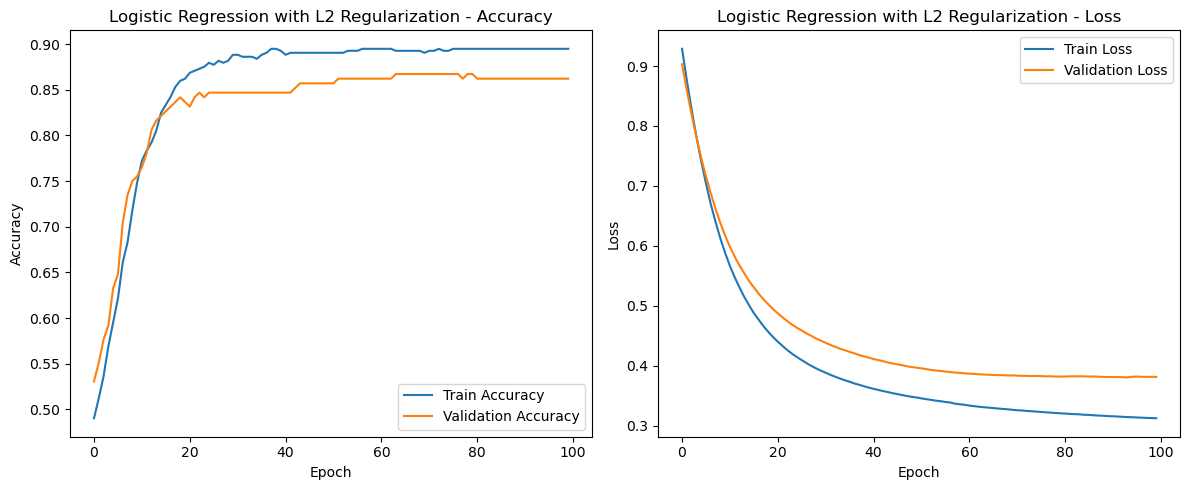

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Data (use your preprocessed df_encoded)
X = df_encoded.drop("A16 (Class)", axis=1).values.astype(np.float32)
y = df_encoded["A16 (Class)"].values.astype(np.float32)

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/validation split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Define logistic regression model with L2 regularization
model = Sequential([
    Dense(1, activation='sigmoid',
          input_shape=(X_train.shape[1],),
          kernel_regularizer=regularizers.l2(0.01))
])

# Compile
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                    epochs=100, batch_size=32, verbose=0)

# Plot accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Logistic Regression with L2 Regularization - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Logistic Regression with L2 Regularization - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


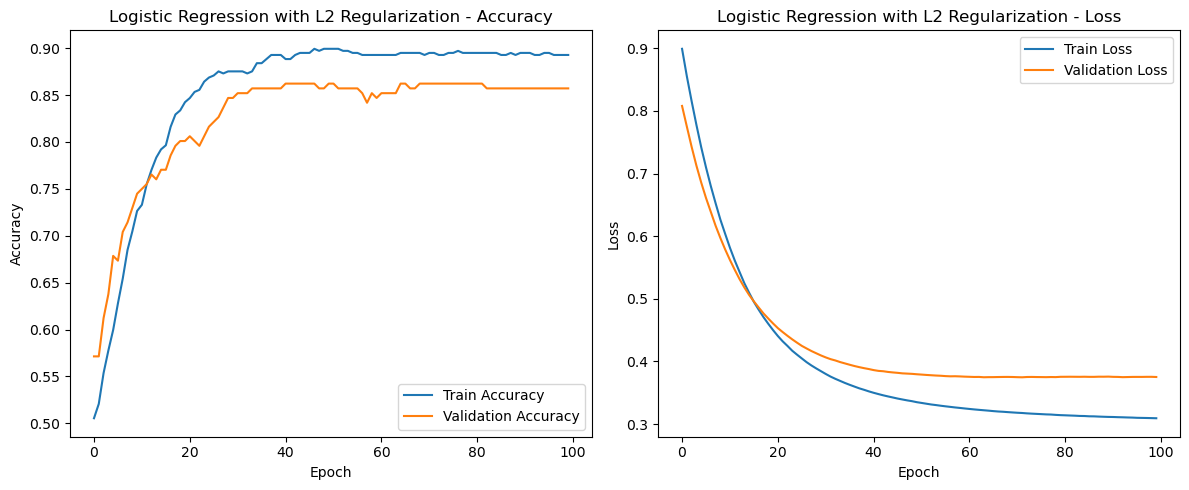

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Data (use your preprocessed df_encoded)
X = df_encoded.drop("A16 (Class)", axis=1).values.astype(np.float32)
y = df_encoded["A16 (Class)"].values.astype(np.float32)

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/validation split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Define logistic regression model with L2 regularization
model = Sequential([
    Dense(1, activation='sigmoid',
          input_shape=(X_train.shape[1],),
          kernel_regularizer=regularizers.l2(0.01))
])

# Compile
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                    epochs=100, batch_size=32, verbose=0)

# Plot accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Logistic Regression with L2 Regularization - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Logistic Regression with L2 Regularization - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


7813/7813 [==============================] - 3s 331us/step


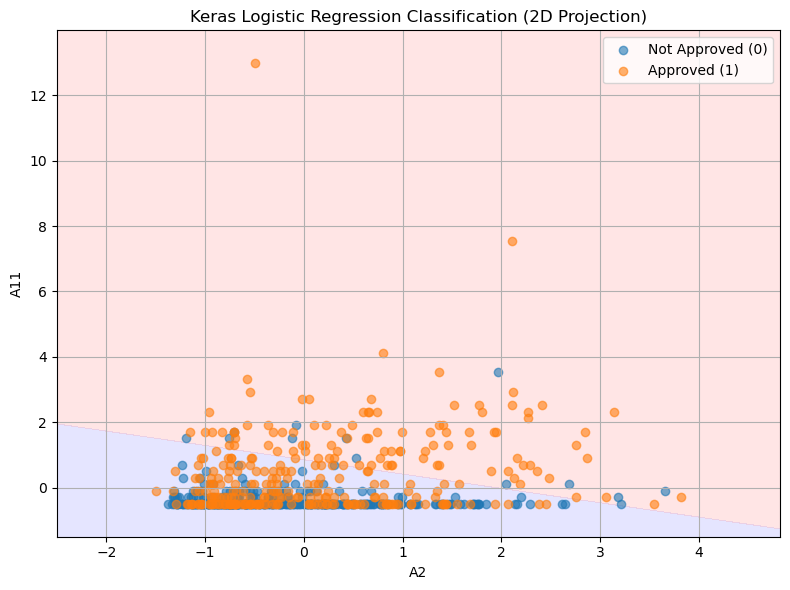

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

# Step 1: Pick two numeric features
top_features = ['A2', 'A11']
X_2d = df_encoded[top_features].values.astype(np.float32)
y = df_encoded["A16 (Class)"].values.astype(int)

# Step 2: Scale using the same logic
scaler = StandardScaler()
X_2d_scaled = scaler.fit_transform(X_2d)

# Step 3: Create meshgrid for plotting decision surface
x_min, x_max = X_2d_scaled[:, 0].min() - 1, X_2d_scaled[:, 0].max() + 1
y_min, y_max = X_2d_scaled[:, 1].min() - 1, X_2d_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

grid = np.c_[xx.ravel(), yy.ravel()]
# Pad the rest of the input with 0s since the model expects full input length
X_grid_full = np.zeros((grid.shape[0], X_train.shape[1]), dtype=np.float32)

# Replace the two chosen features in the zeroed grid
f1_idx = df_encoded.columns.get_loc(top_features[0])
f2_idx = df_encoded.columns.get_loc(top_features[1])
X_grid_full[:, f1_idx] = grid[:, 0]
X_grid_full[:, f2_idx] = grid[:, 1]

# Predict using the full logistic regression model
Z = model.predict(X_grid_full).reshape(xx.shape)

# Step 4: Plot decision boundary and points
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.2, cmap='bwr')

plt.scatter(X_2d_scaled[y == 0][:, 0], X_2d_scaled[y == 0][:, 1],
            label='Not Approved (0)', alpha=0.6)
plt.scatter(X_2d_scaled[y == 1][:, 0], X_2d_scaled[y == 1][:, 1],
            label='Approved (1)', alpha=0.6)

plt.xlabel(top_features[0])
plt.ylabel(top_features[1])
plt.title('Keras Logistic Regression Classification (2D Projection)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


7813/7813 [==============================] - 3s 349us/step


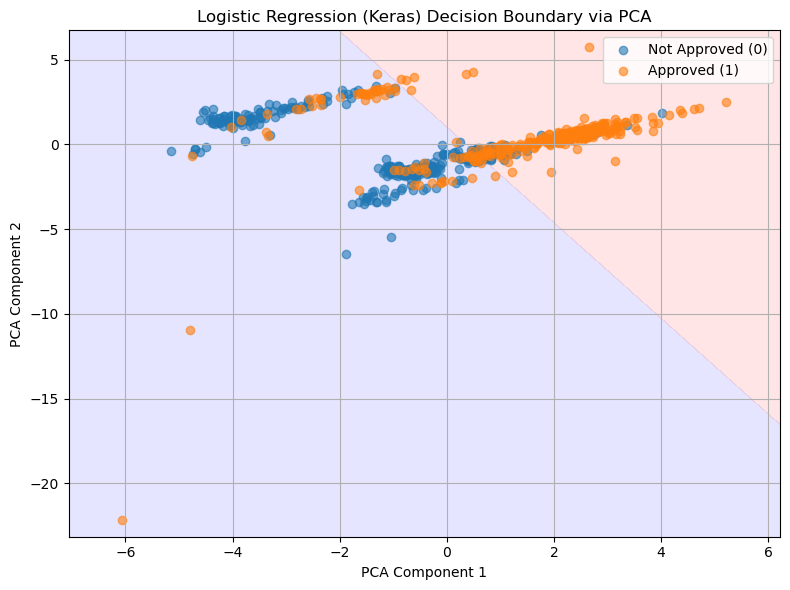

In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Standardize full data (if not already)
X = df_encoded.drop("A16 (Class)", axis=1).values.astype(np.float32)
y = df_encoded["A16 (Class)"].values.astype(int)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Fit PCA and transform to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 3: Create 2D grid in PCA space
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

grid_pca = np.c_[xx.ravel(), yy.ravel()]

# Step 4: Inverse-transform PCA → original feature space → predict
X_grid_original = pca.inverse_transform(grid_pca)  # shape (N, num_features)
Z = model.predict(X_grid_original).reshape(xx.shape)

# Step 5: Plot decision boundary + real data
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.2, cmap='bwr')

plt.scatter(X_pca[y == 0][:, 0], X_pca[y == 0][:, 1], alpha=0.6, label='Not Approved (0)')
plt.scatter(X_pca[y == 1][:, 0], X_pca[y == 1][:, 1], alpha=0.6, label='Approved (1)')

plt.title('Logistic Regression (Keras) Decision Boundary via PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [24]:
from sklearn.linear_model import LogisticRegression

# Standardize the full dataset
X = df_encoded.drop("A16 (Class)", axis=1)
y = df_encoded["A16 (Class)"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train logistic regression (scikit-learn for coefficients)
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_scaled, y)

# Get top 3 features by absolute weight
coef_abs = np.abs(logreg.coef_[0])
top_3_indices = np.argsort(coef_abs)[-3:][::-1]
top_3_features = X.columns[top_3_indices].tolist()

print("🔥 Top 3 predictive features:", top_3_features)


🔥 Top 3 predictive features: ['A15', 'A9_t', 'A9_f']


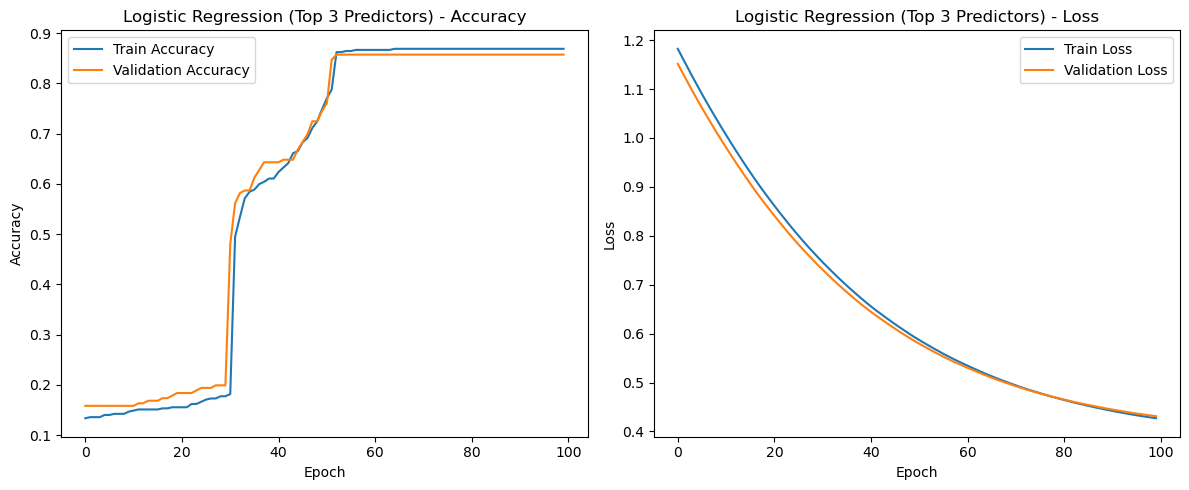

In [25]:
# Subset X to just the top 3 features
X_top3 = df_encoded[top_3_features].values.astype(np.float32)
y = df_encoded["A16 (Class)"].values.astype(np.float32)

# Standardize
scaler_top3 = StandardScaler()
X_top3_scaled = scaler_top3.fit_transform(X_top3)

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_top3_scaled, y, test_size=0.3, random_state=42)

# Define Keras logistic regression model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

model = Sequential([
    Dense(1, activation='sigmoid', input_shape=(3,),
          kernel_regularizer=regularizers.l2(0.01))
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=100, batch_size=32, verbose=0)

# Plot accuracy/loss
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Logistic Regression (Top 3 Predictors) - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Logistic Regression (Top 3 Predictors) - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


313/313 [==============================] - 0s 345us/step


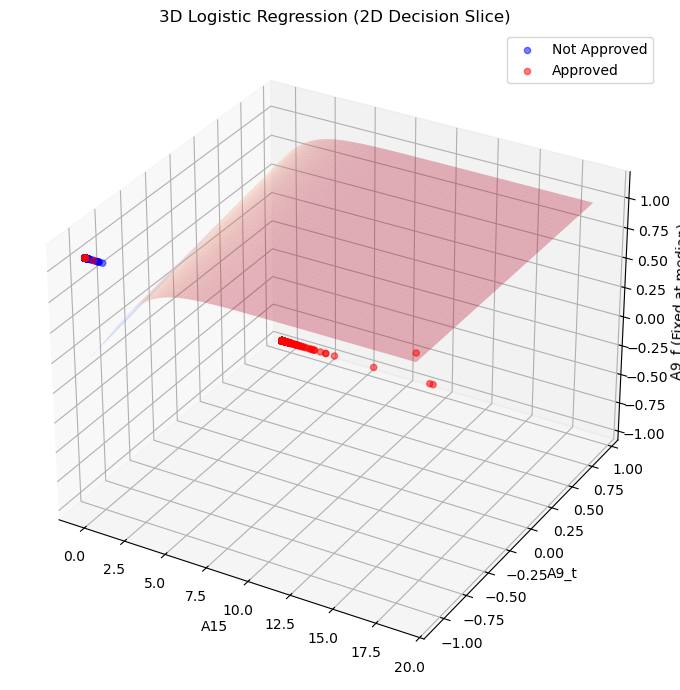

In [26]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Step 1: Prepare 3D data again
X_3d = df_encoded[top_3_features].values.astype(np.float32)
y = df_encoded["A16 (Class)"].values.astype(int)
X_3d_scaled = scaler_top3.transform(X_3d)

# Step 2: Fix Z dimension and create meshgrid in X-Y plane
x_range = np.linspace(X_3d_scaled[:, 0].min(), X_3d_scaled[:, 0].max(), 100)
y_range = np.linspace(X_3d_scaled[:, 1].min(), X_3d_scaled[:, 1].max(), 100)
xx, yy = np.meshgrid(x_range, y_range)
zz_fixed = np.median(X_3d_scaled[:, 2])  # hold Z constant

# Step 3: Create full input grid (N, 3)
grid = np.c_[xx.ravel(), yy.ravel(), np.full(xx.ravel().shape, zz_fixed)]
Z = model.predict(grid).reshape(xx.shape)

# Step 4: Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Data points
ax.scatter(X_3d_scaled[y == 0, 0], X_3d_scaled[y == 0, 1], X_3d_scaled[y == 0, 2],
           color='blue', label='Not Approved', alpha=0.5)
ax.scatter(X_3d_scaled[y == 1, 0], X_3d_scaled[y == 1, 1], X_3d_scaled[y == 1, 2],
           color='red', label='Approved', alpha=0.5)

# Decision boundary (2D surface in 3D space)
ax.plot_surface(xx, yy, Z, cmap='coolwarm', alpha=0.3)

# Labels
ax.set_xlabel(top_3_features[0])
ax.set_ylabel(top_3_features[1])
ax.set_zlabel(f"{top_3_features[2]} (Fixed at median)")
ax.set_title("3D Logistic Regression (2D Decision Slice)")
ax.legend()
plt.tight_layout()
plt.show()


7813/7813 [==============================] - 3s 353us/step


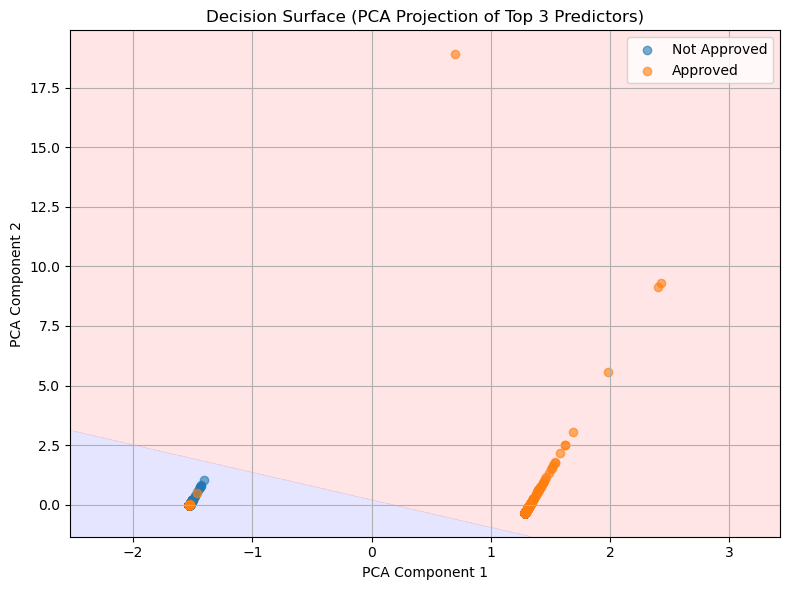

In [28]:
from sklearn.decomposition import PCA

# Step 1: PCA to 2D from 3 scaled features
pca = PCA(n_components=2)
X_pca_2d = pca.fit_transform(X_3d_scaled)

# Step 2: Meshgrid in PCA space
x_min, x_max = X_pca_2d[:, 0].min() - 1, X_pca_2d[:, 0].max() + 1
y_min, y_max = X_pca_2d[:, 1].min() - 1, X_pca_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
grid_2d = np.c_[xx.ravel(), yy.ravel()]

# Step 3: Inverse transform to 3D feature space
grid_3d = pca.inverse_transform(grid_2d)

# Step 4: Predict using model
Z = model.predict(grid_3d).reshape(xx.shape)

# Step 5: Plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.2, cmap='bwr')
plt.scatter(X_pca_2d[y == 0, 0], X_pca_2d[y == 0, 1], label='Not Approved', alpha=0.6)
plt.scatter(X_pca_2d[y == 1, 0], X_pca_2d[y == 1, 1], label='Approved', alpha=0.6)

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Decision Surface (PCA Projection of Top 3 Predictors)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# print(f"Total number of points in plot: {X_all_pca.shape[0]}")


7/7 [==============================] - 0s 622us/step


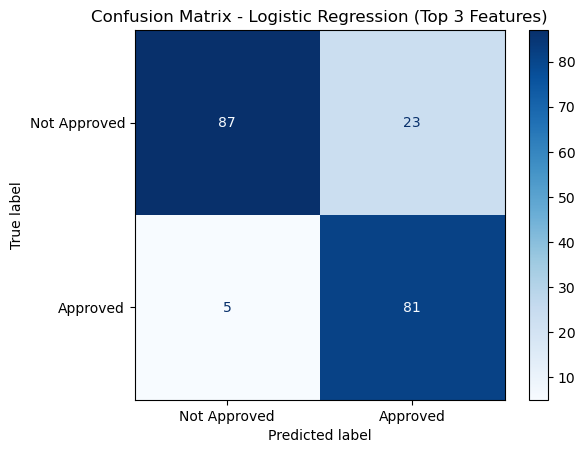

📋 Classification Report:
              precision    recall  f1-score   support

Not Approved       0.95      0.79      0.86       110
    Approved       0.78      0.94      0.85        86

    accuracy                           0.86       196
   macro avg       0.86      0.87      0.86       196
weighted avg       0.87      0.86      0.86       196



In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Predict on the validation set
y_pred_probs = model.predict(X_val)
y_pred = (y_pred_probs > 0.5).astype(int)

# Confusion matrix
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Approved", "Approved"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression (Top 3 Features)")
plt.grid(False)
plt.show()

# Optional: Print precision/recall/F1 report
print("📋 Classification Report:")
print(classification_report(y_val, y_pred, target_names=["Not Approved", "Approved"]))


In [30]:
# Step 1: Predict on validation set
y_pred_probs = model.predict(X_val)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# Step 2: Identify misclassified indexes
misclassified_idx = np.where(y_pred != y_val)[0]

print(f"🔍 Total misclassifications: {len(misclassified_idx)}")

# Step 3: Create Series for true and predicted
misclassified_true = pd.Series(y_val, index=np.arange(len(y_val))).iloc[misclassified_idx]
misclassified_pred = pd.Series(y_pred[misclassified_idx], index=misclassified_true.index, name="Predicted")

# Step 4: Recover original (unscaled) feature values
X_val_orig = pd.DataFrame(scaler_top3.inverse_transform(X_val), columns=top_3_features)
misclassified_df = X_val_orig.iloc[misclassified_idx].copy()
misclassified_df["True Label"] = misclassified_true.values
misclassified_df["Predicted Label"] = misclassified_pred.values

# Step 5: Preview
misclassified_df.head(10)


7/7 [==============================] - 0s 861us/step
🔍 Total misclassifications: 28


A15          A9_t          A9_f  True Label  Predicted Label
0   209.999939  1.000000e+00 -1.282458e-08         0.0                1
6    -0.000006  1.000000e+00 -1.282458e-08         0.0                1
8    -0.000006  1.000000e+00 -1.282458e-08         0.0                1
11   -0.000006  1.000000e+00 -1.282458e-08         0.0                1
18   -0.000006  1.000000e+00 -1.282458e-08         0.0                1
23    0.999994 -1.697774e-08  1.000000e+00         1.0                0
28   -0.000006 -1.697774e-08  1.000000e+00         1.0                0
47   -0.000006  1.000000e+00 -1.282458e-08         0.0                1
60   -0.000006  1.000000e+00 -1.282458e-08         0.0                1
65   -0.000006  1.000000e+00 -1.282458e-08         0.0                1

7813/7813 [==============================] - 4s 497us/step


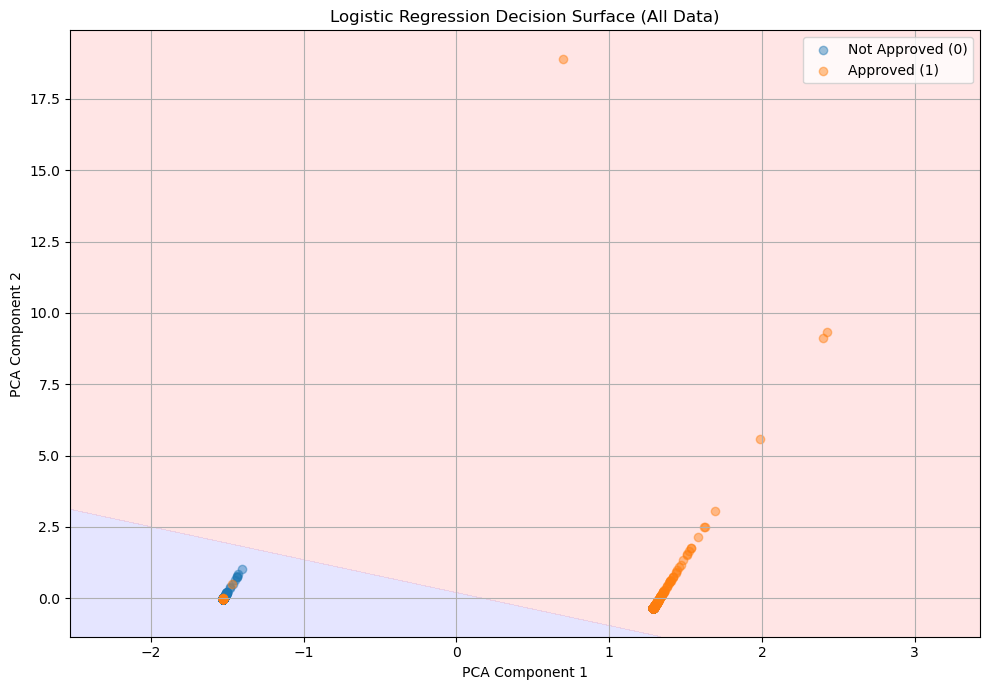

Total number of points in plot: 653


In [31]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Recombine the full dataset using the original top 3 features
X_all = df_encoded[top_3_features].values.astype(np.float32)
y_all = df_encoded["A16 (Class)"].values.astype(int)

# Step 2: Re-scale using the same scaler
X_all_scaled = scaler_top3.transform(X_all)

# Step 3: Fit PCA on all points and transform
pca_all = PCA(n_components=2)
X_all_pca = pca_all.fit_transform(X_all_scaled)

# Step 4: Create 2D meshgrid in PCA space
x_min, x_max = X_all_pca[:, 0].min() - 1, X_all_pca[:, 0].max() + 1
y_min, y_max = X_all_pca[:, 1].min() - 1, X_all_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
grid_2d = np.c_[xx.ravel(), yy.ravel()]

# Step 5: Inverse-transform grid to original feature space (for prediction)
grid_3d = pca_all.inverse_transform(grid_2d)
Z = model.predict(grid_3d).reshape(xx.shape)

# Step 6: Plot decision surface + all data points
plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.2, cmap='bwr')

# Scatter all points
plt.scatter(X_all_pca[y_all == 0, 0], X_all_pca[y_all == 0, 1], label='Not Approved (0)', alpha=0.45)
plt.scatter(X_all_pca[y_all == 1, 0], X_all_pca[y_all == 1, 1], label='Approved (1)', alpha=0.45)

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Logistic Regression Decision Surface (All Data)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Total number of points in plot: {X_all_pca.shape[0]}")


# Dropping Multi-Collinear variables

In [32]:
# Load the newly uploaded data
df = pd.read_csv('./crx.data', header=None, na_values="?")
df.columns = [f"A{i+1}" for i in range(df.shape[1])]
df.rename(columns={"A16": "A16 (Class)"}, inplace=True)
df["A16 (Class)"] = df["A16 (Class)"].astype(str).str.strip().map({'+': 1, '-': 0})
df = df.dropna()

# One-hot encode categorical variables (keep all dummies)
df_encoded = pd.get_dummies(df, drop_first=False).astype(int)

# Recalculate the correlation matrix and find perfectly correlated columns
X = df_encoded.drop("A16 (Class)", axis=1)
corr_matrix = X.corr().abs()

# Identify perfectly correlated pairs (excluding self-correlation)
perfect_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        if corr_matrix.iloc[i, j] == 1.0:
            col1 = corr_matrix.columns[i]
            col2 = corr_matrix.columns[j]
            perfect_corr_pairs.append((col1, col2))

# Convert to DataFrame and display
perfect_corr_df = pd.DataFrame(perfect_corr_pairs, columns=["Feature 1", "Feature 2"])
perfect_corr_df.head(20)


Feature 1 Feature 2
0      A1_a      A1_b
1      A4_l     A5_gg
2      A4_u      A5_g
3      A4_y      A5_p
4     A10_f     A10_t
5     A12_f     A12_t

# Pairs like A1_a/A1_b, A10_f/A10_t, A12_f/A12_t make sense — these are two-value categorical features, so one-hot encoding gives two perfectly inverse columns

# But A4_l ↔ A5_gg, and similar, looks suspicious — they're from different original features and should not be perfectly correlated under normal conditions

# ⚠️ You may have a small number of rows with rare values — and by coincidence, A4_l = 1 always appears with A5_gg = 1, etc.

# These are accidental correlations due to the small dataset.



In [33]:
# Apply a broader set of drops to remove all known collinear features
cols_to_drop = [
    'A1_b', 'A4_y', 'A5_p', 'A6_q', 'A7_z', 'A9_f',
    'A10_t', 'A12_t', 'A13_s'
]
df_encoded_clean = df_encoded.drop(columns=cols_to_drop)

# Prepare X and y for statsmodels
X = df_encoded_clean.drop("A16 (Class)", axis=1)
y = df_encoded_clean["A16 (Class)"]

# Add intercept and fit with robust handling of convergence
import statsmodels.api as sm
X_with_const = sm.add_constant(X)

try:
    logit_model = sm.Logit(y, X_with_const)
    result = logit_model.fit(disp=False)  # suppress fitting output
    summary_output = result.summary()
except Exception as e:
    summary_output = str(e)

summary_output



/opt/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            A16 (Class)   No. Observations:                  653
Model:                          Logit   Df Residuals:                      617
Method:                           MLE   Df Model:                           35
Date:                Sat, 19 Apr 2025   Pseudo R-squ.:                  0.5952
Time:                        21:10:48   Log-Likelihood:                -182.07
converged:                      False   LL-Null:                       -449.77
Covariance Type:            nonrobust   LLR p-value:                 7.743e-91
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.6708      2.778     -2.761      0.006     -13.116      -2.226
A2             0.0131      0.017      0.778      0.436      -0.020       0.046
A3            -0.0236      0.032     -0.744      0.457      -0.086       0.039
A8             0.0832      0.046      1.801      0.072      -0.007       0.174
A11            0.1293      0.060      2.157      0.031       0.012       0.247
A14           -0.0026      0.480     -0.005      0.996      -0.943       0.937
A15            0.0006      0.000      2.922      0.003       0.000       0.001
A1_a           0.0863      0.309      0.279      0.780      -0.520       0.692
A4_l          11.5034        nan        nan        nan         nan         nan
A4_u           0.4243   2.01e+08   2.11e-09      1.000   -3.95e+08    3.95e+08
A5_g           0.4243      2e+08   2.12e-09      1.000   -3.92e+08    3.92e+08
A5_gg         11.5034        nan        nan        nan         nan         nan
A6_aa         -0.3179        nan        nan        nan         nan         nan
A6_c          -0.0003      0.607     -0.000      1.000      -1.189       1.189
A6_cc          1.1207        nan        nan        nan         nan         nan
A6_d           0.4958      0.623      0.796      0.426      -0.724       1.716
A6_e           1.7674      1.306      1.353      0.176      -0.793       4.327
A6_ff         -4.1128        nan        nan        nan         nan         nan
A6_i          -0.6554    282.520     -0.002      0.998    -554.385     553.074
A6_j          -4.6186      2.135     -2.164      0.030      -8.803      -0.435
A6_k          -0.7126      0.580     -1.229      0.219      -1.850       0.424
A6_m          -0.1355      0.621     -0.218      0.827      -1.352       1.081
A6_r          -2.1723      4.475     -0.485      0.627     -10.943       6.598
A6_w           0.6166      0.493      1.251      0.211      -0.349       1.583
A6_x           2.4904        nan        nan        nan         nan         nan
A7_bb          3.5255      2.100      1.679      0.093      -0.591       7.641
A7_dd          2.5564      2.002      1.277      0.202      -1.367       6.480
A7_ff          5.8953      2.883      2.045      0.041       0.245      11.546
A7_h           4.0474        nan        nan        nan         nan         nan
A7_j           7.9775      3.067      2.601      0.009       1.967      13.988
A7_n           6.7767        nan        nan        nan         nan         nan
A7_o         -12.2295   1.38e+04     -0.001      0.999    -2.7e+04     2.7e+04
A7_v           3.8298      1.979      1.935      0.053      -0.049       7.708
A9_t           3.8640        nan        nan        nan         nan         nan
A10_f         -0.4274      0.381     -1.121      0.262      -1.175       0.320
A12_f          0.2480    116.480      0.002      0.998    -228.048     228.544
A13_g          0.0832      0.188      0.443      0.658      -0.285       0.451
A13_p         -9.7411         -0        inf      0.000      -9.741      -9.741
==

In [34]:
# Extract and organize summary table with p-values
summary_table = result.summary2().tables[1]  # Get the coefficient summary table
sorted_by_pval = summary_table.sort_values("P>|z|", ascending=True)
sorted_by_pval.head(20)


Coef.  Std.Err.         z     P>|z|     [0.025     0.975]
A13_p -9.741127 -0.000000       inf  0.000000  -9.741127  -9.741127
A15    0.000567  0.000194  2.921818  0.003480   0.000187   0.000947
const -7.670844  2.777977 -2.761306  0.005757 -13.115579  -2.226110
A7_j   7.977475  3.066774  2.601259  0.009288   1.966708  13.988242
A6_j  -4.618597  2.134723 -2.163558  0.030498  -8.802577  -0.434616
A11    0.129277  0.059942  2.156715  0.031028   0.011794   0.246760
A7_ff  5.895300  2.882907  2.044915  0.040863   0.244907  11.545693
A7_v   3.829783  1.978827  1.935381  0.052944  -0.048646   7.708212
A8     0.083151  0.046167  1.801099  0.071687  -0.007334   0.173636
A7_bb  3.525489  2.100033  1.678778  0.093195  -0.590500   7.641477
A6_e   1.767373  1.306137  1.353130  0.176014  -0.792608   4.327354
A7_dd  2.556423  2.001823  1.277047  0.201585  -1.367078   6.479923
A6_w   0.616577  0.492839  1.251070  0.210909  -0.349371   1.582524
A6_k  -0.712643  0.580065 -1.228556  0.219238  -1.849550   0.424264
A10_f -0.427426  0.381410 -1.120646  0.262439  -1.174977   0.320125
A6_d   0.495757  0.622526  0.796364  0.425821  -0.724372   1.715886
A2     0.013122  0.016858  0.778380  0.436345  -0.019919   0.046163
A3    -0.023593  0.031724 -0.743689  0.457064  -0.085771   0.038585
A6_r  -2.172289  4.474879 -0.485441  0.627364 -10.942891   6.598313
A13_g  0.083188  0.187662  0.443283  0.657561  -0.284624   0.450999

✅ Keep (Significant predictors):
| Feature | Coef | P>|z| | Notes | |-----------|----------|-----------|-------| | A13_p | -9.74 | 0.000 | Strong signal but suspicious (maybe very rare?) ⚠️
| A15 | +0.00057 | 0.00348 | ✅ Reliable small positive predictor
| const | -7.67 | 0.00576 | Intercept (baseline log-odds)
| A7_j | +7.98 | 0.00929 | ✅ Strong approval signal
| A6_j | -4.62 | 0.03050 | ✅ Strong negative predictor
| A11 | +0.13 | 0.03103 | ✅ More credit lines → approval
| A7_ff | +5.90 | 0.04086 | ✅ Strong positive predictor

In [35]:
final_features = [
    'A15',
    'A7_j',
    'A6_j',
    'A11',
    'A7_ff'
]

# Optional extras:
# 'A7_v', 'A8'


2813/2813 [==============================] - 1s 410us/step


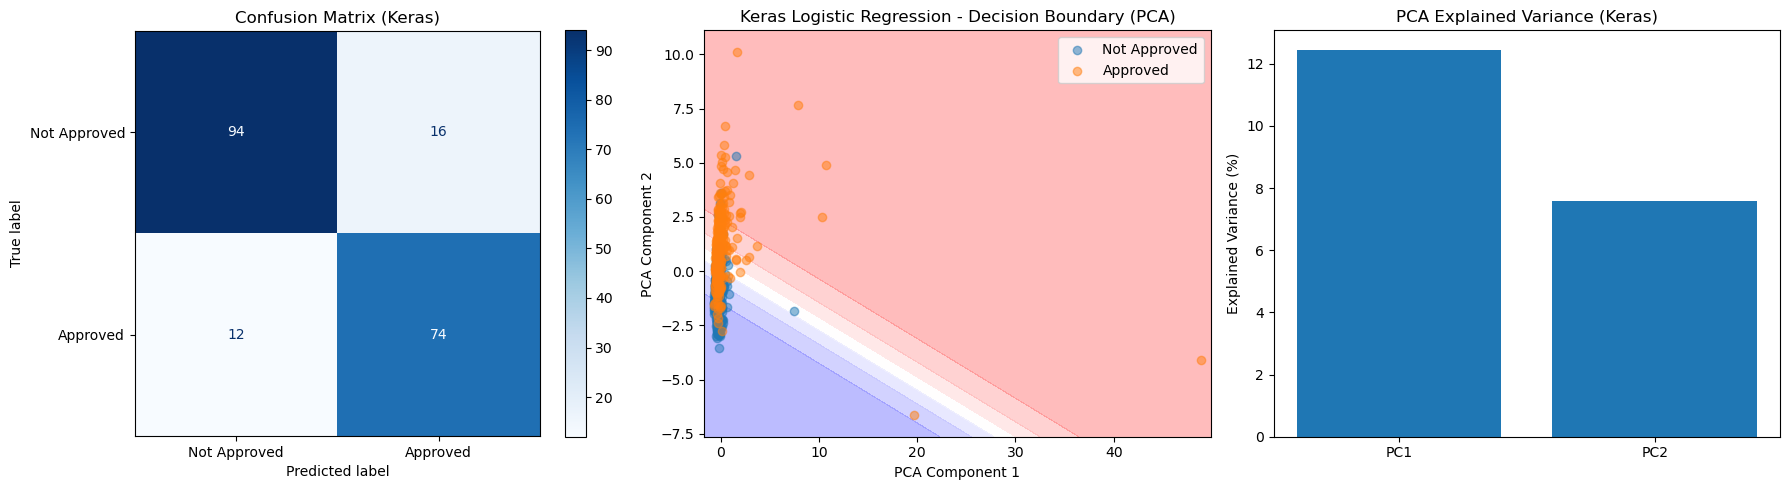

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

# Reuse final features and data split
X_train_k, X_val_k, y_train_k, y_val_k = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale
scaler_k = StandardScaler()
X_train_k_scaled = scaler_k.fit_transform(X_train_k)
X_val_k_scaled = scaler_k.transform(X_val_k)

# Define a Keras logistic regression model with L2 regularization
model = Sequential([
    Dense(1, activation='sigmoid', input_shape=(X_train_k_scaled.shape[1],),
          kernel_regularizer=regularizers.l2(0.01))
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_k_scaled, y_train_k, validation_data=(X_val_k_scaled, y_val_k),
                    epochs=100, batch_size=32, verbose=0)

# Predict for confusion matrix
y_val_pred_probs = model.predict(X_val_k_scaled)
y_val_pred_classes = (y_val_pred_probs > 0.5).astype(int)
cm_keras = confusion_matrix(y_val_k, y_val_pred_classes)

# PCA projection of the full dataset for decision boundary
X_all_k_scaled = scaler_k.transform(X)
pca_k = PCA(n_components=2)
X_pca_k = pca_k.fit_transform(X_all_k_scaled)

# Decision boundary
xx, yy = np.meshgrid(np.linspace(X_pca_k[:, 0].min() - 1, X_pca_k[:, 0].max() + 1, 300),
                     np.linspace(X_pca_k[:, 1].min() - 1, X_pca_k[:, 1].max() + 1, 300))
grid_pca_k = np.c_[xx.ravel(), yy.ravel()]
grid_orig_k = pca_k.inverse_transform(grid_pca_k)
Z_k = model.predict(grid_orig_k).reshape(xx.shape)

# Plot
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# 1. Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix=cm_keras, display_labels=["Not Approved", "Approved"]).plot(ax=axs[0], cmap='Blues')
axs[0].set_title("Confusion Matrix (Keras)")

# 2. PCA Decision Boundary
axs[1].contourf(xx, yy, Z_k, alpha=0.3, cmap='bwr')
axs[1].scatter(X_pca_k[y == 0, 0], X_pca_k[y == 0, 1], label='Not Approved', alpha=0.5)
axs[1].scatter(X_pca_k[y == 1, 0], X_pca_k[y == 1, 1], label='Approved', alpha=0.5)
axs[1].set_title("Keras Logistic Regression - Decision Boundary (PCA)")
axs[1].set_xlabel("PCA Component 1")
axs[1].set_ylabel("PCA Component 2")
axs[1].legend()

# 3. PCA Variance
axs[2].bar(["PC1", "PC2"], pca_k.explained_variance_ratio_ * 100)
axs[2].set_ylabel("Explained Variance (%)")
axs[2].set_title("PCA Explained Variance (Keras)")

plt.tight_layout()
plt.show()


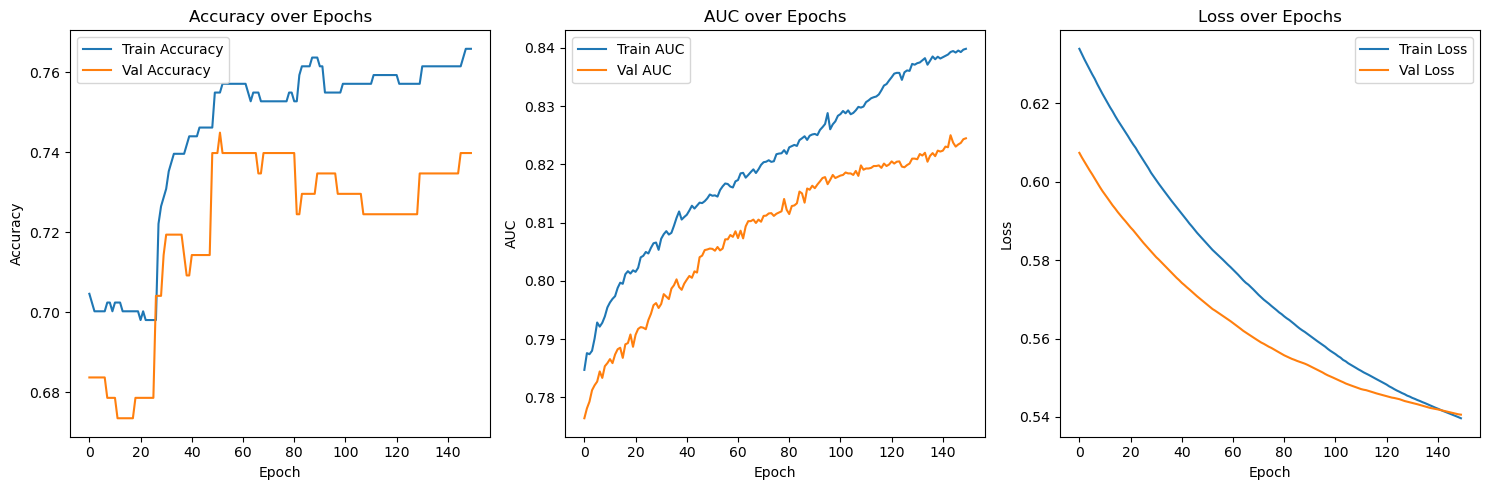

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.metrics import AUC

# === Final selected features ===
final_features = ['A15', 'A7_j', 'A6_j', 'A11', 'A7_ff', 'A7_v', 'A8']
X = df_encoded[final_features].values
y = df_encoded["A16 (Class)"].values

# === Split and scale ===
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# === Keras logistic model ===
model = Sequential([
    Dense(1, activation='sigmoid',
          input_shape=(X_train_scaled.shape[1],),
          kernel_regularizer=regularizers.l2(0.01))
])

model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='binary_crossentropy',
              metrics=['accuracy', AUC(name='auc')])

# === Train ===
history = model.fit(X_train_scaled, y_train,
                    validation_data=(X_val_scaled, y_val),
                    epochs=150,
                    batch_size=64,
                    verbose=0)

# === Plot metrics ===
plt.figure(figsize=(15, 5))

# Accuracy
plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# AUC
plt.subplot(1, 3, 2)
plt.plot(history.history['auc'], label='Train AUC')
plt.plot(history.history['val_auc'], label='Val AUC')
plt.title("AUC over Epochs")
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.legend()

# Loss
plt.subplot(1, 3, 3)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


2813/2813 [==============================] - 1s 426us/step


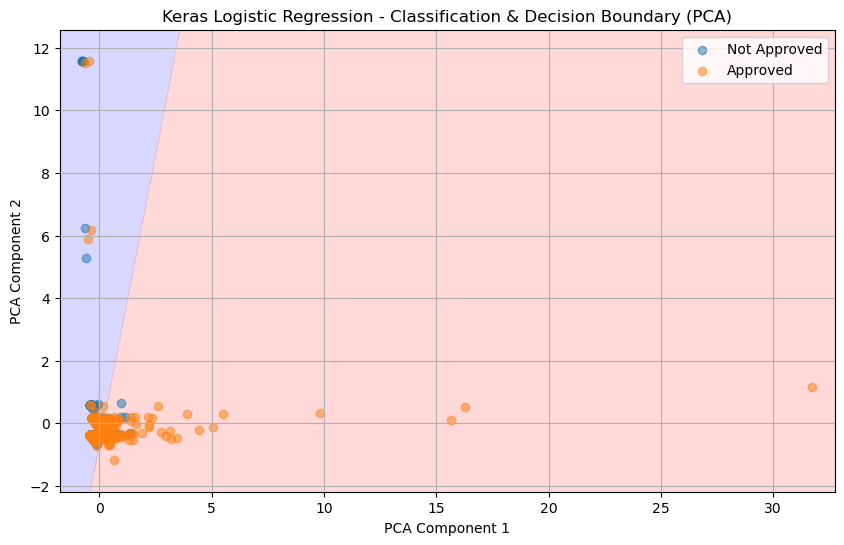

In [40]:
from sklearn.decomposition import PCA

# Combine full dataset and scale
X_all_scaled = scaler.transform(X)
y_all = y  # already defined

# PCA for 2D projection
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_all_scaled)

# Predict probabilities across PCA space
xx, yy = np.meshgrid(np.linspace(X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1, 300),
                     np.linspace(X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1, 300))
grid_pca = np.c_[xx.ravel(), yy.ravel()]
grid_original = pca.inverse_transform(grid_pca)
Z = model.predict(grid_original).reshape(xx.shape)

# Plot decision boundary + actual points
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.3, cmap='bwr')
plt.scatter(X_pca[y_all == 0, 0], X_pca[y_all == 0, 1], label="Not Approved", alpha=0.5)
plt.scatter(X_pca[y_all == 1, 0], X_pca[y_all == 1, 1], label="Approved", alpha=0.5)
plt.legend()
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Keras Logistic Regression - Classification & Decision Boundary (PCA)")
plt.grid(True)
plt.show()

# # Confusion Matrix
# cm = confusion_matrix(y_test, y_pred)
# ConfusionMatrixDisplay(cm, display_labels=["Not Approved", "Approved"]).plot(cmap='Blues')
# plt.title("Random Forest - Confusion Matrix")
# plt.grid(False)
# plt.show()

# # Evaluate
# y_pred = rf.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print(f"✅ Random Forest Accuracy: {accuracy:.4f}")



# Random forest

✅ Random Forest Accuracy: 0.7755


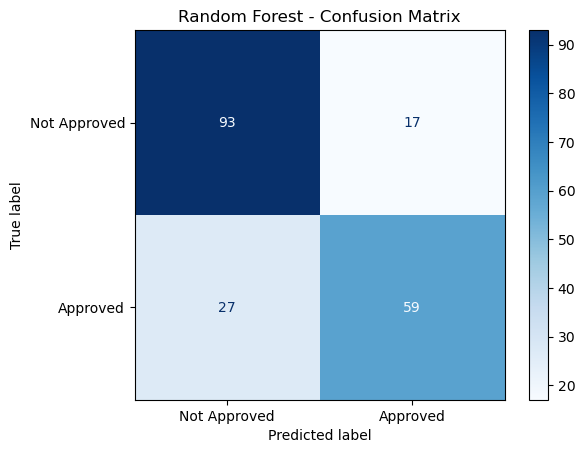

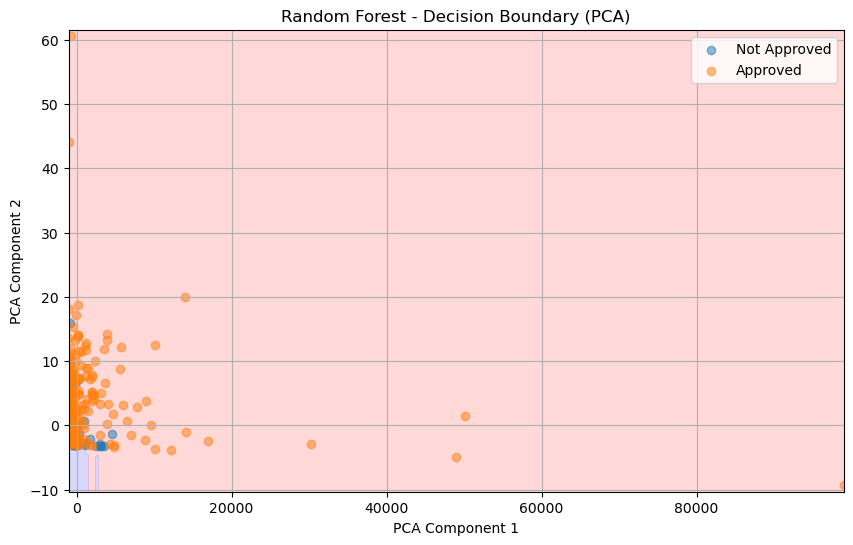

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Final features
final_features = ['A15', 'A7_j', 'A6_j', 'A11', 'A7_ff', 'A7_v', 'A8']
X = df_encoded[final_features].values
y = df_encoded["A16 (Class)"].values

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42)
rf.fit(X_train, y_train)

# Evaluate
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Random Forest Accuracy: {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=["Not Approved", "Approved"]).plot(cmap='Blues')
plt.title("Random Forest - Confusion Matrix")
plt.grid(False)
plt.show()

# PCA for 2D decision surface
X_all = np.vstack((X_train, X_test))
y_all = np.concatenate((y_train, y_test))
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_all)

# Grid for decision boundary
xx, yy = np.meshgrid(np.linspace(X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1, 300),
                     np.linspace(X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1, 300))
grid_pca = np.c_[xx.ravel(), yy.ravel()]
grid_original = pca.inverse_transform(grid_pca)
Z = rf.predict(grid_original).reshape(xx.shape)

# Plot
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.3, cmap='bwr')
plt.scatter(X_pca[y_all == 0, 0], X_pca[y_all == 0, 1], label="Not Approved", alpha=0.5)
plt.scatter(X_pca[y_all == 1, 0], X_pca[y_all == 1, 1], label="Approved", alpha=0.5)
plt.title("Random Forest - Decision Boundary (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()


Visualize feature importances

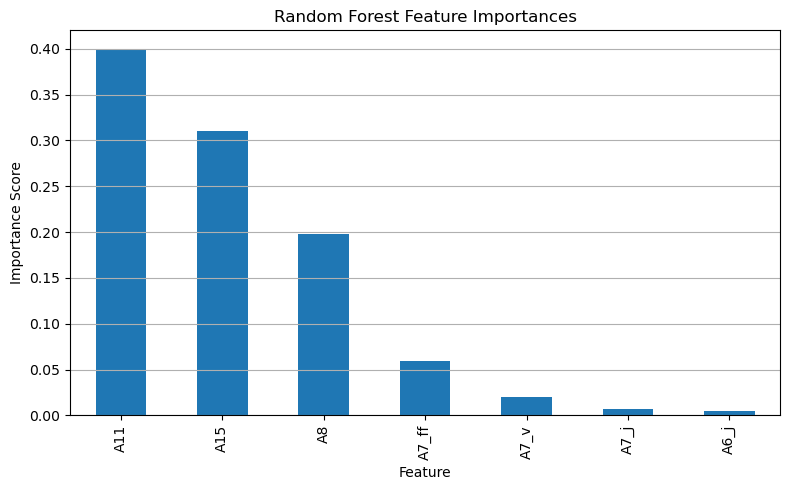

A11      0.400057
A15      0.310554
A8       0.198352
A7_ff    0.059286
A7_v     0.020307
A7_j     0.006526
A6_j     0.004918
dtype: float64

In [42]:
importances = rf.feature_importances_
importance_series = pd.Series(importances, index=final_features).sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(8, 5))
importance_series.plot(kind='bar')
plt.title("Random Forest Feature Importances")
plt.ylabel("Importance Score")
plt.xlabel("Feature")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

importance_series


Feature	Importance	Meaning
A11	0.400	✅ Most influential — number of existing credit lines
A15	0.311	✅ High impact — likely monetary amount or duration
A8	0.198	✅ Useful — possibly credit history or guarantees

Others are minor

# Random forest with 3 features


✅ Random Forest (Top 3 Features) Accuracy: 0.7398


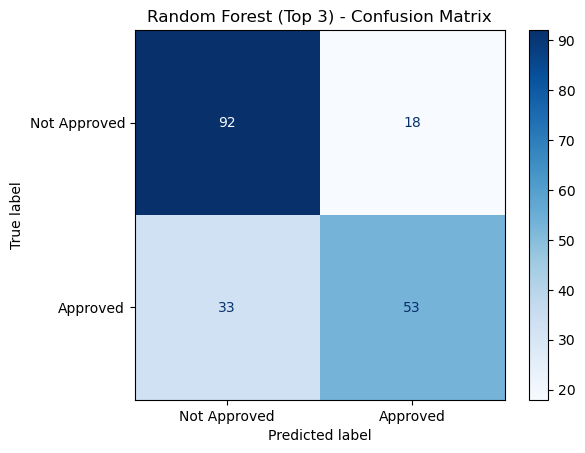

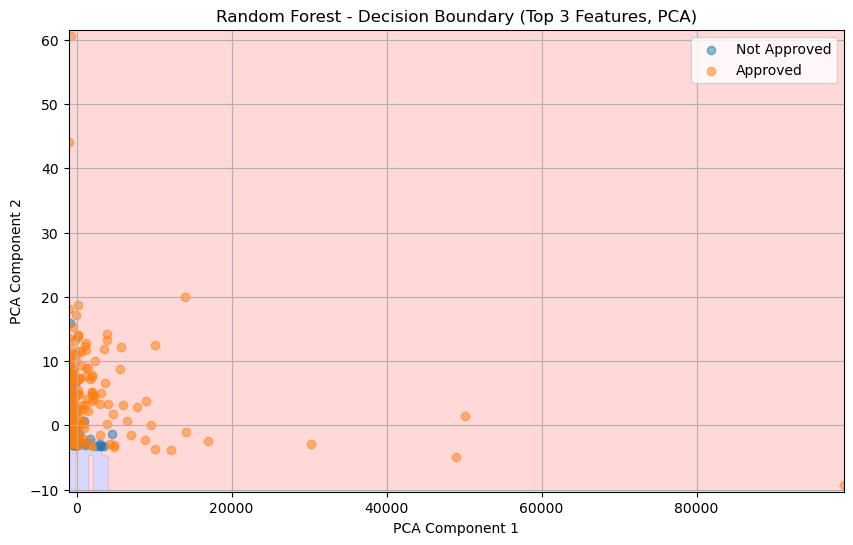

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Use only the top 3 features
top3_features = ['A11', 'A15', 'A8']
X_top3 = df_encoded[top3_features].values
y_top3 = df_encoded["A16 (Class)"].values

# Train/test split
X_train_rf3, X_test_rf3, y_train_rf3, y_test_rf3 = train_test_split(X_top3, y_top3, test_size=0.3, random_state=42)

# Train Random Forest
rf_top3 = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42)
rf_top3.fit(X_train_rf3, y_train_rf3)

# Predict and evaluate
y_pred_rf3 = rf_top3.predict(X_test_rf3)
accuracy_rf3 = accuracy_score(y_test_rf3, y_pred_rf3)
cm_rf3 = confusion_matrix(y_test_rf3, y_pred_rf3)

# Display accuracy and confusion matrix
print(f"✅ Random Forest (Top 3 Features) Accuracy: {accuracy_rf3:.4f}")
ConfusionMatrixDisplay(confusion_matrix=cm_rf3, display_labels=["Not Approved", "Approved"]).plot(cmap='Blues')
plt.title("Random Forest (Top 3) - Confusion Matrix")
plt.grid(False)
plt.show()

# PCA for decision boundary
X_all_rf3 = np.vstack((X_train_rf3, X_test_rf3))
y_all_rf3 = np.concatenate((y_train_rf3, y_test_rf3))
pca_rf3 = PCA(n_components=2)
X_pca_rf3 = pca_rf3.fit_transform(X_all_rf3)

# Create decision boundary
xx, yy = np.meshgrid(np.linspace(X_pca_rf3[:, 0].min() - 1, X_pca_rf3[:, 0].max() + 1, 300),
                     np.linspace(X_pca_rf3[:, 1].min() - 1, X_pca_rf3[:, 1].max() + 1, 300))
grid_pca_rf3 = np.c_[xx.ravel(), yy.ravel()]
grid_orig_rf3 = pca_rf3.inverse_transform(grid_pca_rf3)
Z_rf3 = rf_top3.predict(grid_orig_rf3).reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z_rf3, levels=[0, 0.5, 1], alpha=0.3, cmap='bwr')
plt.scatter(X_pca_rf3[y_all_rf3 == 0, 0], X_pca_rf3[y_all_rf3 == 0, 1], label="Not Approved", alpha=0.5)
plt.scatter(X_pca_rf3[y_all_rf3 == 1, 0], X_pca_rf3[y_all_rf3 == 1, 1], label="Approved", alpha=0.5)
plt.title("Random Forest - Decision Boundary (Top 3 Features, PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()


# Logistic regression with 3 features

✅ Logistic Regression (Top 3 Features) Accuracy: 0.7551


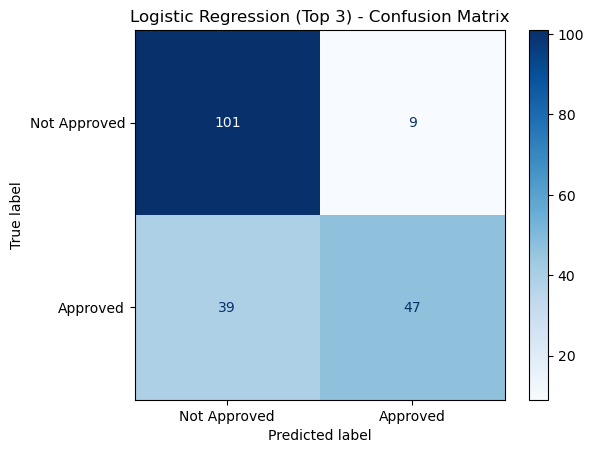

In [44]:
from sklearn.linear_model import LogisticRegression

# Train logistic regression using the same top 3 features
logreg_top3 = LogisticRegression()
logreg_top3.fit(X_train_rf3, y_train_rf3)

# Predict and evaluate
y_pred_logreg3 = logreg_top3.predict(X_test_rf3)
accuracy_logreg3 = accuracy_score(y_test_rf3, y_pred_logreg3)
cm_logreg3 = confusion_matrix(y_test_rf3, y_pred_logreg3)

# Display accuracy and confusion matrix
print(f"✅ Logistic Regression (Top 3 Features) Accuracy: {accuracy_logreg3:.4f}")
ConfusionMatrixDisplay(confusion_matrix=cm_logreg3, display_labels=["Not Approved", "Approved"]).plot(cmap='Blues')
plt.title("Logistic Regression (Top 3) - Confusion Matrix")
plt.grid(False)
plt.show()


# Multi-Layer Perceptron with 3 features (MLP)

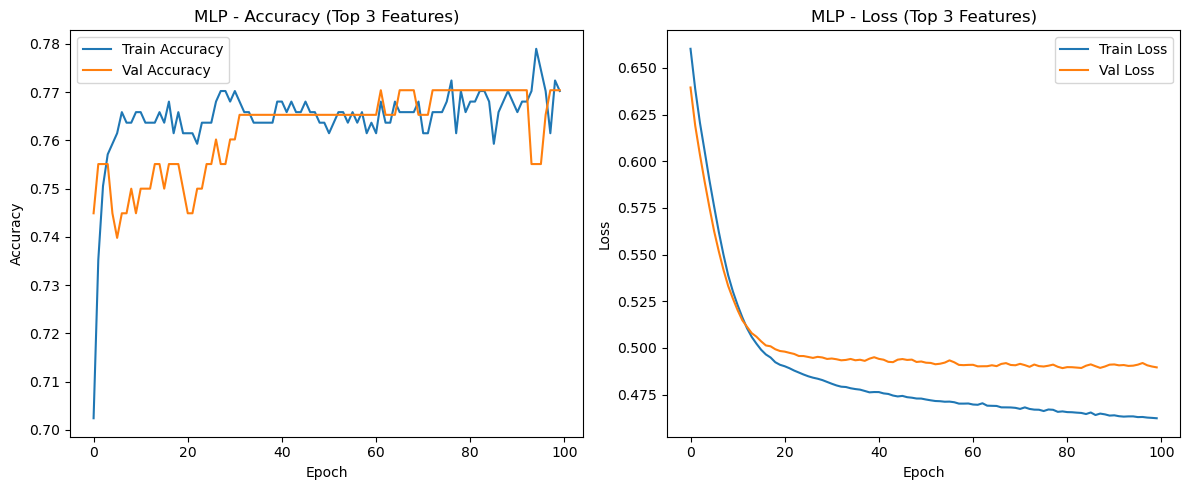

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# === Use top 3 predictors ===
top3_features = ['A11', 'A15', 'A8']
X = df_encoded[top3_features].values
y = df_encoded["A16 (Class)"].values

# === Split and scale ===
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# === Define the MLP ===
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# === Train ===
history = model.fit(X_train_scaled, y_train,
                    validation_data=(X_val_scaled, y_val),
                    epochs=100, batch_size=32, verbose=0)

# === Plot accuracy and loss ===
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("MLP - Accuracy (Top 3 Features)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("MLP - Loss (Top 3 Features)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


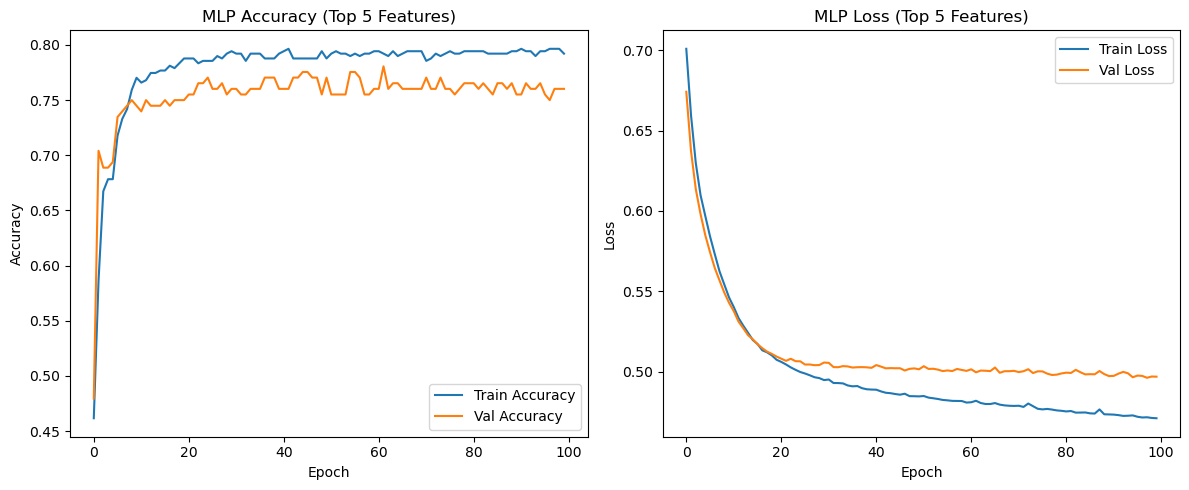

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Top 5 features from feature importance
top5_features = ['A11', 'A15', 'A8', 'A7_ff', 'A7_v']
X = df_encoded[top5_features].values
y = df_encoded["A16 (Class)"].values

# Split and scale
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Define MLP
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train
history = model.fit(X_train_scaled, y_train,
                    validation_data=(X_val_scaled, y_val),
                    epochs=100, batch_size=32, verbose=0)

# Plot Accuracy and Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("MLP Accuracy (Top 5 Features)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("MLP Loss (Top 5 Features)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


# XGBoost

✅ XGBoost Accuracy: 0.7449
🎯 XGBoost AUC: 0.8110


/opt/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [21:12:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


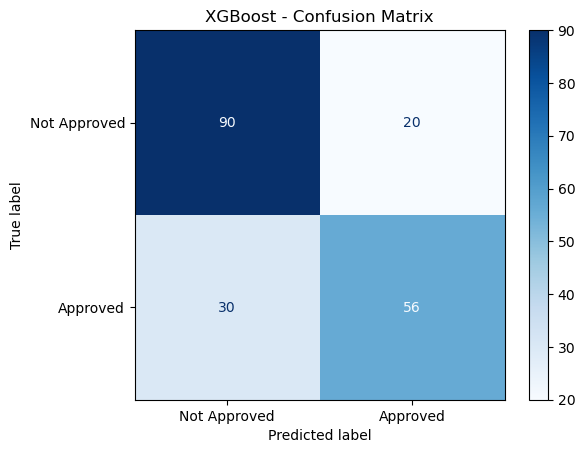

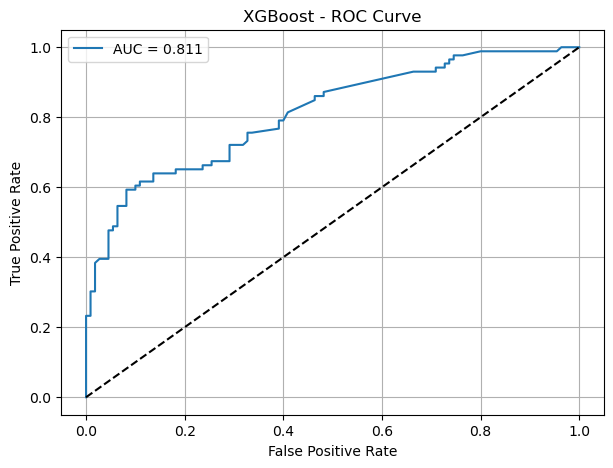

<Figure size 800x500 with 0 Axes>

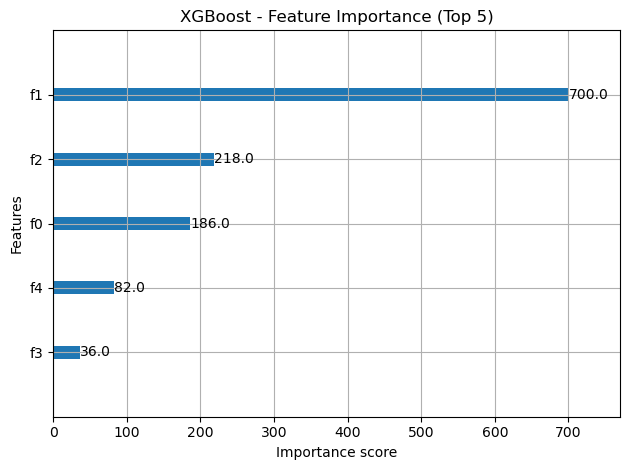

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve

# === Select top 5 features ===
top5_features = ['A11', 'A15', 'A8', 'A7_ff', 'A7_v']
X = df_encoded[top5_features].values
y = df_encoded["A16 (Class)"].values

# === Train/test split ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# === Train XGBoost classifier ===
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# === Evaluate ===
y_pred = xgb_model.predict(X_test)
y_probs = xgb_model.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_probs)
cm = confusion_matrix(y_test, y_pred)

print(f"✅ XGBoost Accuracy: {accuracy:.4f}")
print(f"🎯 XGBoost AUC: {auc:.4f}")

# === Confusion Matrix ===
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Approved", "Approved"]).plot(cmap='Blues')
plt.title("XGBoost - Confusion Matrix")
plt.grid(False)
plt.show()

# === ROC Curve ===
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("XGBoost - ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

# === Feature Importance ===
plt.figure(figsize=(8, 5))
plot_importance(xgb_model, importance_type='weight', max_num_features=10)
plt.title("XGBoost - Feature Importance (Top 5)")
plt.tight_layout()
plt.show()


XGBoost Code:

f0
f1	
f2	
f3	
f4

Real Feature:

A11
A15
A8
A7_ff
A7_v

# A11 (number of credit lines) is consistently your MVP across all models

# A15 and A8 are reliable support features

# A7_ff and A7_v help marginally — dropping them likely won’t hurt much

✅ XGBoost (Top 3) Accuracy: 0.7347
🎯 XGBoost (Top 3) AUC: 0.8063


/opt/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [21:20:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


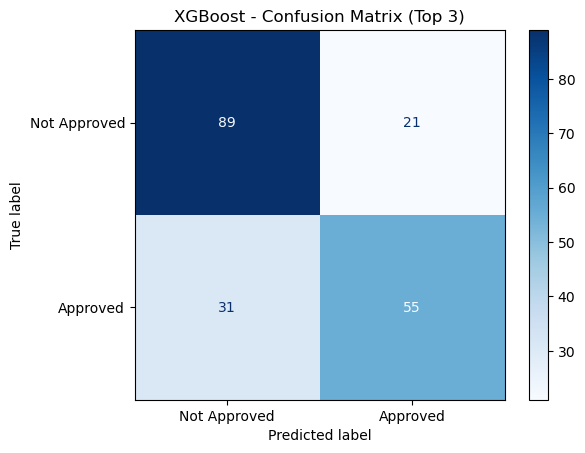

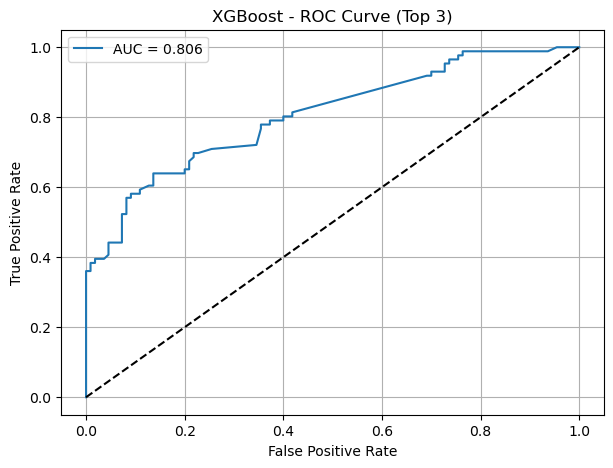

<Figure size 800x500 with 0 Axes>

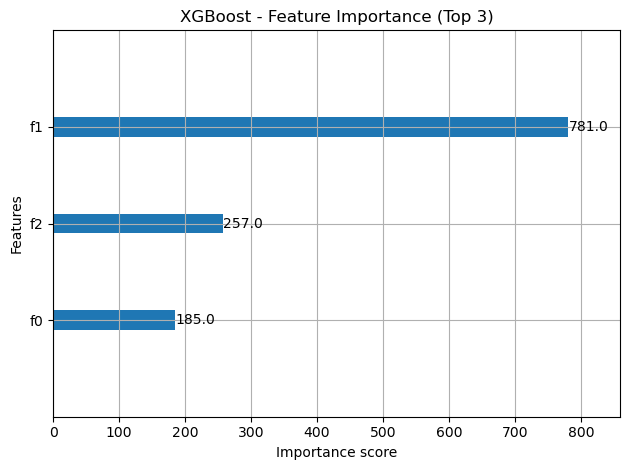

In [49]:
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, ConfusionMatrixDisplay, roc_curve

# Top 3 most important features
top3_xgb_features = ['A11', 'A15', 'A8']
X_top3_xgb = df_encoded[top3_xgb_features].values
y_top3_xgb = df_encoded["A16 (Class)"].values

# Train/test split
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_top3_xgb, y_top3_xgb, test_size=0.3, random_state=42)

# Train XGBoost on top 3
xgb_top3 = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_top3.fit(X_train_3, y_train_3)

# Evaluate
y_pred_3 = xgb_top3.predict(X_test_3)
y_probs_3 = xgb_top3.predict_proba(X_test_3)[:, 1]
acc_3 = accuracy_score(y_test_3, y_pred_3)
auc_3 = roc_auc_score(y_test_3, y_probs_3)
cm_3 = confusion_matrix(y_test_3, y_pred_3)

# Display metrics and confusion matrix
print(f"✅ XGBoost (Top 3) Accuracy: {acc_3:.4f}")
print(f"🎯 XGBoost (Top 3) AUC: {auc_3:.4f}")
ConfusionMatrixDisplay(cm_3, display_labels=["Not Approved", "Approved"]).plot(cmap='Blues')
plt.title("XGBoost - Confusion Matrix (Top 3)")
plt.grid(False)
plt.show()

# ROC Curve
fpr_3, tpr_3, _ = roc_curve(y_test_3, y_probs_3)
plt.figure(figsize=(7, 5))
plt.plot(fpr_3, tpr_3, label=f"AUC = {auc_3:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("XGBoost - ROC Curve (Top 3)")
plt.legend()
plt.grid(True)
plt.show()

# Feature Importance Plot
plt.figure(figsize=(8, 5))
plot_importance(xgb_top3, importance_type='weight', max_num_features=10)
plt.title("XGBoost - Feature Importance (Top 3)")
plt.tight_layout()
plt.show()


✅ XGBoost (Depth=8, LR=0.05) Accuracy: 0.7602
🎯 XGBoost (Depth=8, LR=0.05) AUC: 0.8313


/opt/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [21:34:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


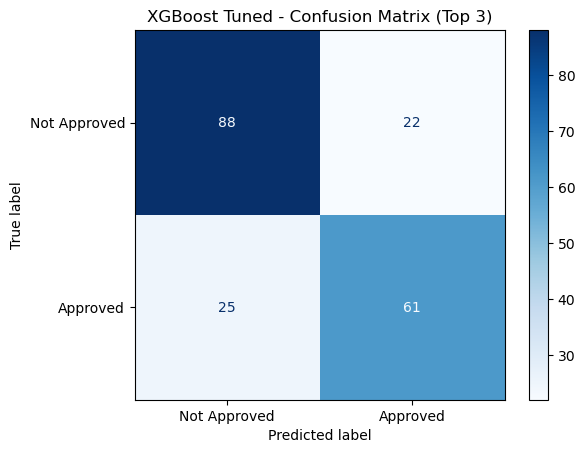

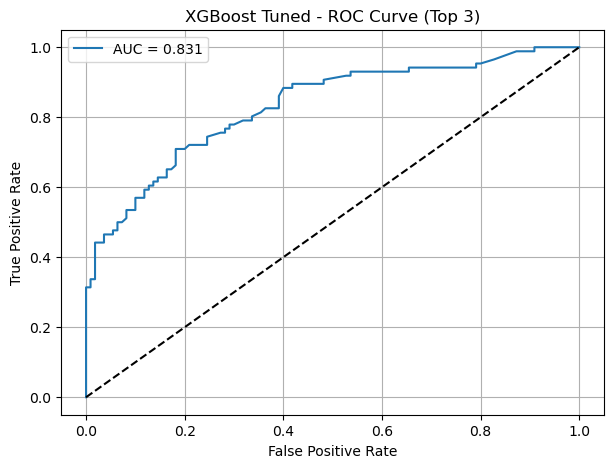

In [60]:
# Reload and reprocess raw data from crx.data
df = pd.read_csv("./crx.data", header=None, na_values="?")
df.columns = [f"A{i+1}" for i in range(df.shape[1])]
df.rename(columns={"A16": "A16 (Class)"}, inplace=True)
df["A16 (Class)"] = df["A16 (Class)"].astype(str).str.strip().map({'+': 1, '-': 0})

# Drop missing
df.dropna(inplace=True)

# Identify categorical variables
categorical_cols = [col for col in df.columns if df[col].dtype == 'object' and col != "A16 (Class)"]

# One-hot encode all categorical columns (without drop_first to retain all info)
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=False)

# Train XGBoost with top 3 features: A11, A15, A8
top3_features = ['A11', 'A15', 'A8']
X = df_encoded[top3_features].values
y = df_encoded["A16 (Class)"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train tuned XGBoost model
xgb_tuned = XGBClassifier(max_depth=8, learning_rate=0.05, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_tuned.fit(X_train, y_train)

# Predict and evaluate
y_pred = xgb_tuned.predict(X_test)
y_probs = xgb_tuned.predict_proba(X_test)[:, 1]
acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_probs)
cm = confusion_matrix(y_test, y_pred)

# Show accuracy and AUC
print(f"✅ XGBoost (Depth=8, LR=0.05) Accuracy: {acc:.4f}")
print(f"🎯 XGBoost (Depth=8, LR=0.05) AUC: {auc:.4f}")

# Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Approved", "Approved"]).plot(cmap='Blues')
plt.title("XGBoost Tuned - Confusion Matrix (Top 3)")
plt.grid(False)
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("XGBoost Tuned - ROC Curve (Top 3)")
plt.legend()
plt.grid(True)
plt.show()


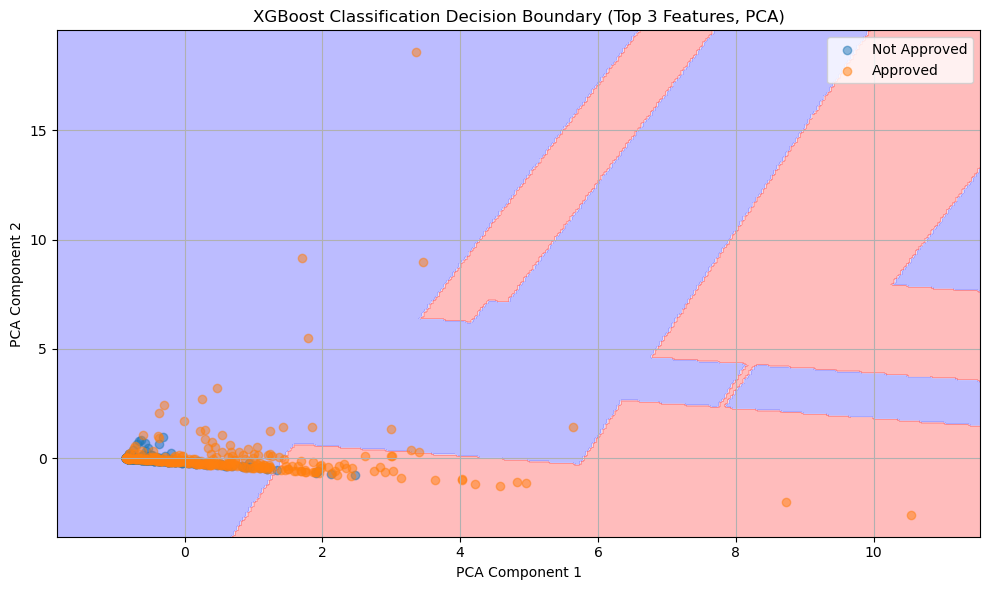

In [61]:
from sklearn.decomposition import PCA

# Reduce to 2D using PCA for visualization
pca = PCA(n_components=2)
X_all_scaled = scaler_lr.fit_transform(X)  # scale full dataset
X_pca = pca.fit_transform(X_all_scaled)
y_all = y  # labels for the whole dataset

# Create meshgrid for decision boundary
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
grid = np.c_[xx.ravel(), yy.ravel()]
grid_original = pca.inverse_transform(grid)
grid_pred = xgb_tuned.predict(grid_original).reshape(xx.shape)

# Plot decision surface with data points
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, grid_pred, alpha=0.3, cmap='bwr')
plt.scatter(X_pca[y_all == 0, 0], X_pca[y_all == 0, 1], label="Not Approved", alpha=0.5)
plt.scatter(X_pca[y_all == 1, 0], X_pca[y_all == 1, 1], label="Approved", alpha=0.5)
plt.title("XGBoost Classification Decision Boundary (Top 3 Features, PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


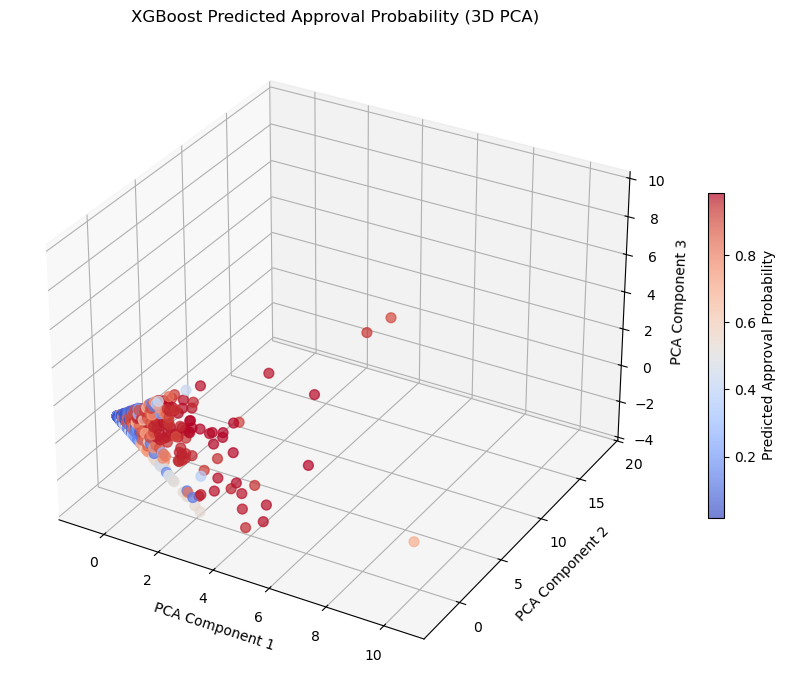

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Top 3 features and labels
top3_features = ['A11', 'A15', 'A8']
X = df_encoded[top3_features].values
y = df_encoded["A16 (Class)"].values

# Scale before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3D PCA
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# Get predicted probabilities from XGBoost
y_probs = xgb_tuned.predict_proba(X)[:, 1]  # probability of approval

# 3D scatter plot colored by predicted probability
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
    c=y_probs, cmap='coolwarm', s=50, alpha=0.7
)

ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
ax.set_title("XGBoost Predicted Approval Probability (3D PCA)")
cbar = fig.colorbar(scatter, ax=ax, shrink=0.5)
cbar.set_label("Predicted Approval Probability")

plt.tight_layout()
plt.show()


✅ Logistic Regression Accuracy (Top 3): 0.7500
🎯 Logistic Regression AUC (Top 3): 0.8094


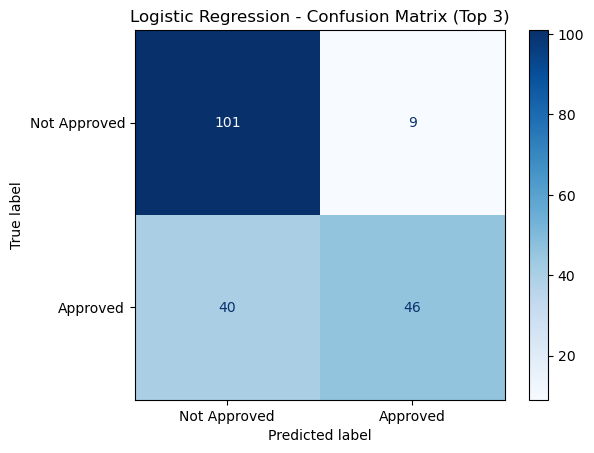

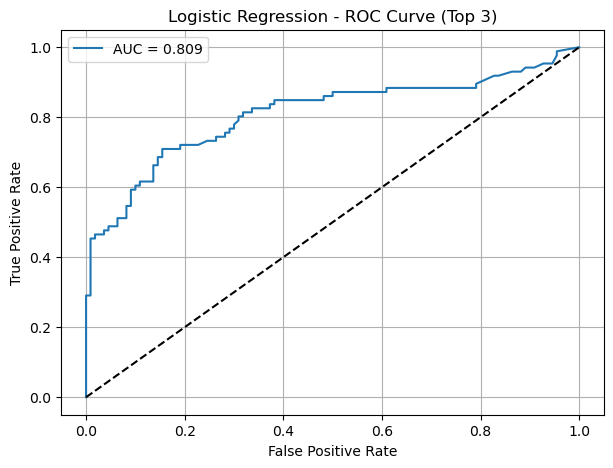

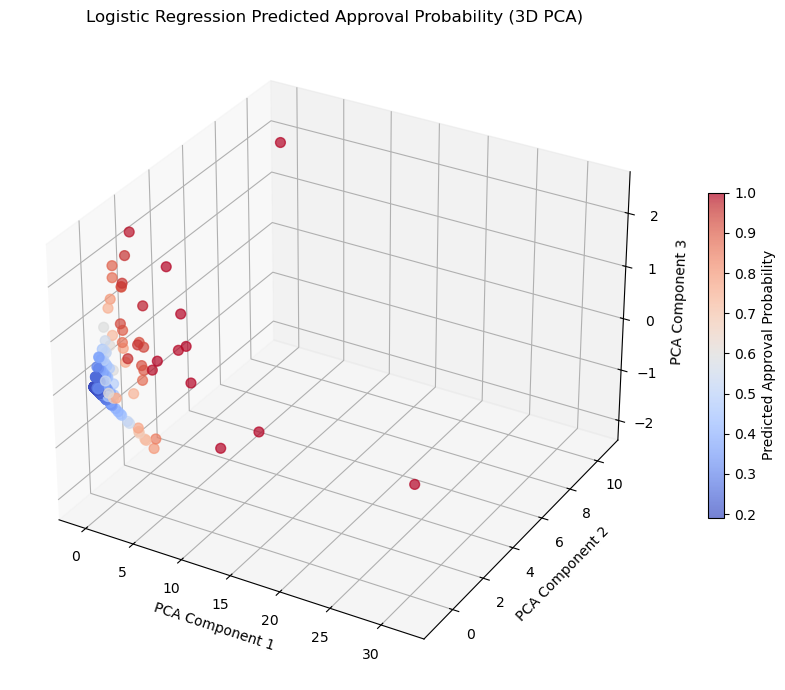

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


# Prepare top 3 features
top3_features = ['A11', 'A15', 'A8']
X = df_encoded[top3_features].values
y = df_encoded["A16 (Class)"].values

# Split and scale
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X, y, test_size=0.3, random_state=42)
scaler_lr = StandardScaler()
X_train_lr_scaled = scaler_lr.fit_transform(X_train_lr)
X_test_lr_scaled = scaler_lr.transform(X_test_lr)

# Train logistic regression with L2 regularization
logreg = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', random_state=42)
logreg.fit(X_train_lr_scaled, y_train_lr)

# Predict and evaluate
y_pred_lr = logreg.predict(X_test_lr_scaled)
y_probs_lr = logreg.predict_proba(X_test_lr_scaled)[:, 1]
acc_lr = accuracy_score(y_test_lr, y_pred_lr)
auc_lr = roc_auc_score(y_test_lr, y_probs_lr)
cm_lr = confusion_matrix(y_test_lr, y_pred_lr)

# Print results
print(f"✅ Logistic Regression Accuracy (Top 3): {acc_lr:.4f}")
print(f"🎯 Logistic Regression AUC (Top 3): {auc_lr:.4f}")

# Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=["Not Approved", "Approved"]).plot(cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix (Top 3)")
plt.grid(False)
plt.show()

# ROC Curve
fpr_lr, tpr_lr, _ = roc_curve(y_test_lr, y_probs_lr)
plt.figure(figsize=(7, 5))
plt.plot(fpr_lr, tpr_lr, label=f"AUC = {auc_lr:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression - ROC Curve (Top 3)")
plt.legend()
plt.grid(True)
plt.show()

# === PCA 3D projection ===
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_test_lr_scaled)

# === Plot ===
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
                     c=y_probs_lr, cmap='coolwarm', s=50, alpha=0.7)

ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
ax.set_title("Logistic Regression Predicted Approval Probability (3D PCA)")
cbar = fig.colorbar(scatter, ax=ax, shrink=0.5)
cbar.set_label("Predicted Approval Probability")

plt.tight_layout()
plt.show()



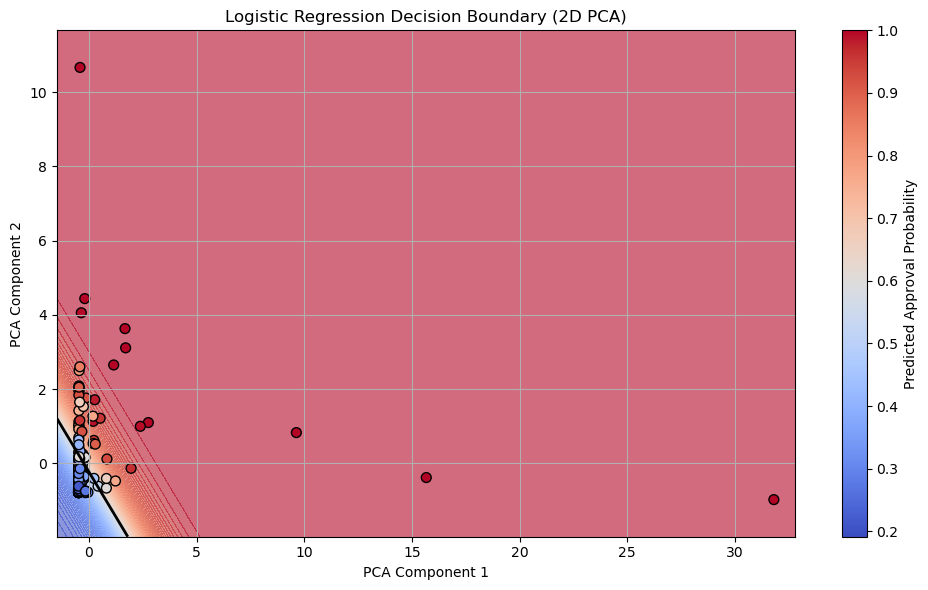

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


# === PCA (2D) ===
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test_scaled)

# === Create meshgrid in PCA space ===
x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
grid_pca = np.c_[xx.ravel(), yy.ravel()]

# === Inverse transform the grid to model feature space ===
grid_original = pca.inverse_transform(grid_pca)
Z = logreg.predict_proba(grid_original)[:, 1].reshape(xx.shape)

# === Plot ===
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, levels=100, cmap='coolwarm', alpha=0.6)
plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)  # decision boundary
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_probs, cmap='coolwarm', s=50, edgecolors='k')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Logistic Regression Decision Boundary (2D PCA)")
cbar = plt.colorbar()
cbar.set_label("Predicted Approval Probability")
plt.grid(True)
plt.tight_layout()
plt.show()


## LOGISTIC REGRESSION

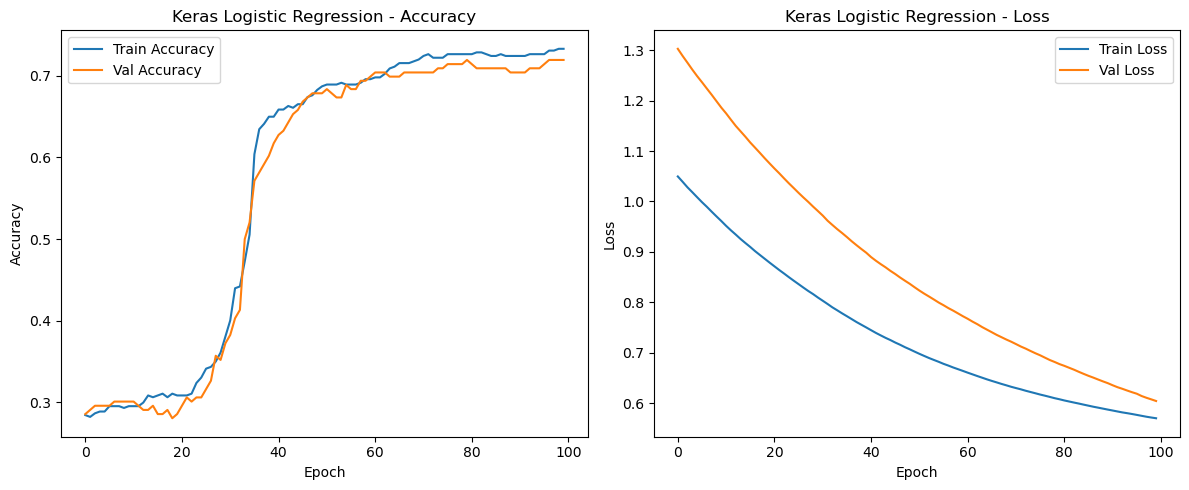

7/7 [==============================] - 0s 433us/step


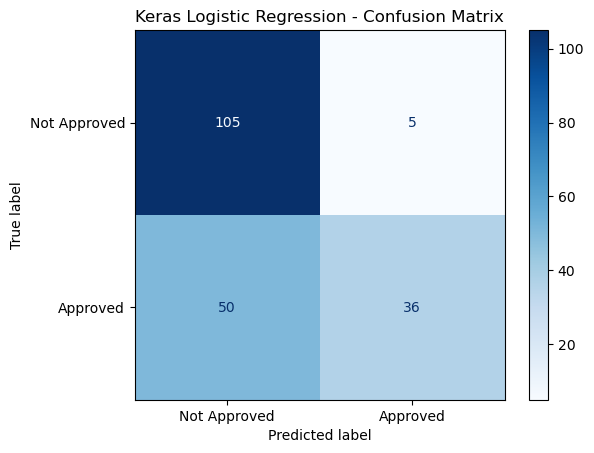

In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import AUC

# Load and preprocess your data
top3_features = ['A11', 'A15', 'A8']
X = df_encoded[top3_features].values
y = df_encoded["A16 (Class)"].values

# Train/val split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Keras model: logistic regression = 1-layer NN
model = Sequential([
    Dense(1, activation='sigmoid', input_shape=(X_train_scaled.shape[1],))
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss=BinaryCrossentropy(),
              metrics=['accuracy', AUC(name="auc")])

# Train
history = model.fit(X_train_scaled, y_train,
                    validation_data=(X_val_scaled, y_val),
                    epochs=100, batch_size=32, verbose=0)

# Plot accuracy & loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Keras Logistic Regression - Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Keras Logistic Regression - Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

# Confusion matrix
y_pred = (model.predict(X_val_scaled) > 0.5).astype(int)
cm = confusion_matrix(y_val, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Approved", "Approved"]).plot(cmap='Blues')
plt.title("Keras Logistic Regression - Confusion Matrix")
plt.grid(False)
plt.show()


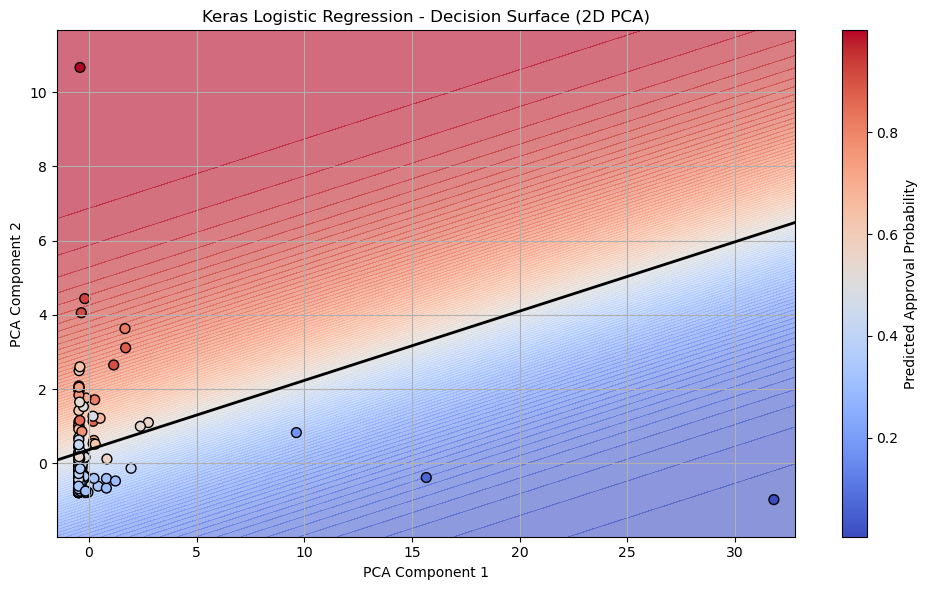

In [76]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# === 2D PCA projection of scaled test set ===
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_val_scaled)

# === Create meshgrid for PCA space ===
x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
grid_pca = np.c_[xx.ravel(), yy.ravel()]
grid_original = pca.inverse_transform(grid_pca)

# === Predict on grid to get decision surface ===
Z = model.predict(grid_original, verbose=0).reshape(xx.shape)

# === Predict on actual test points ===
y_probs = model.predict(X_val_scaled, verbose=0).flatten()

# === Plot ===
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, levels=100, cmap='coolwarm', alpha=0.6)
plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)  # decision boundary
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_probs, cmap='coolwarm', s=50, edgecolor='k')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Keras Logistic Regression - Decision Surface (2D PCA)")
cbar = plt.colorbar()
cbar.set_label("Predicted Approval Probability")
plt.grid(True)
plt.tight_layout()
plt.show()


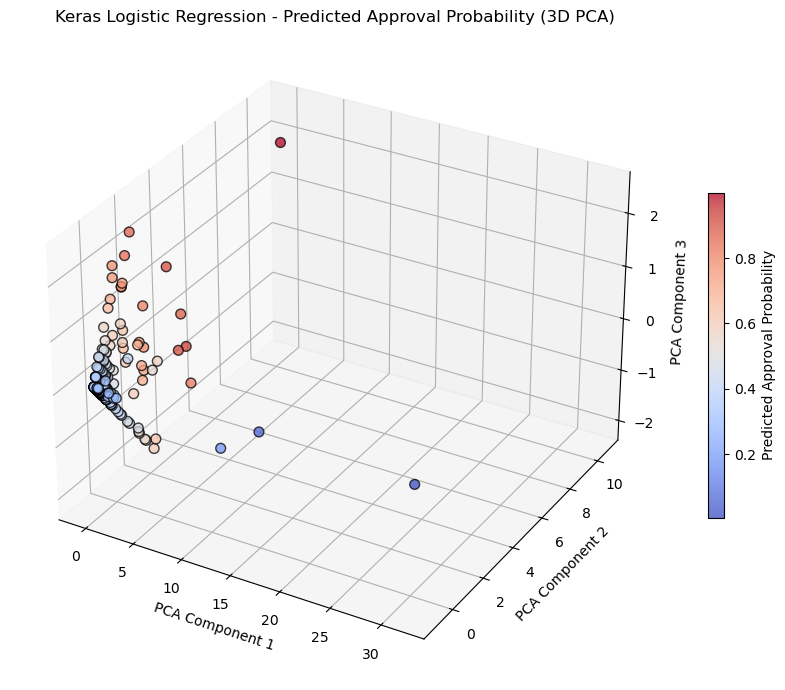

In [77]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# === 3D PCA projection of scaled validation set ===
pca_3d = PCA(n_components=3)
X_val_pca_3d = pca_3d.fit_transform(X_val_scaled)

# === Predicted probabilities from Keras model ===
y_probs_keras = model.predict(X_val_scaled, verbose=0).flatten()

# === 3D scatter plot ===
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_val_pca_3d[:, 0], X_val_pca_3d[:, 1], X_val_pca_3d[:, 2],
    c=y_probs_keras, cmap='coolwarm', s=50, alpha=0.75, edgecolor='k'
)

ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
ax.set_title("Keras Logistic Regression - Predicted Approval Probability (3D PCA)")
cbar = fig.colorbar(scatter, ax=ax, shrink=0.5)
cbar.set_label("Predicted Approval Probability")

plt.tight_layout()
plt.show()


# NONLINEAR REGRESSION

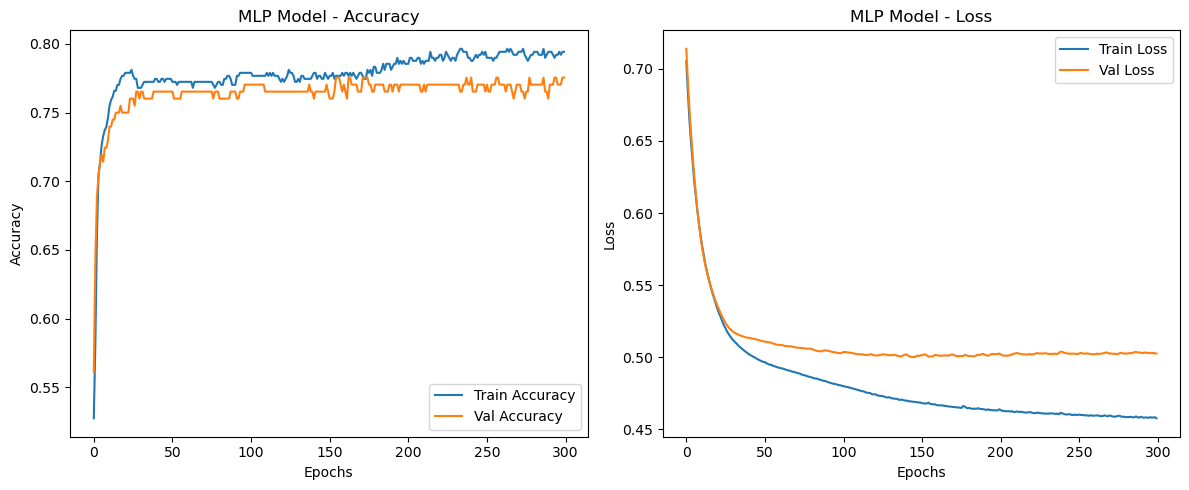

7/7 [==============================] - 0s 371us/step


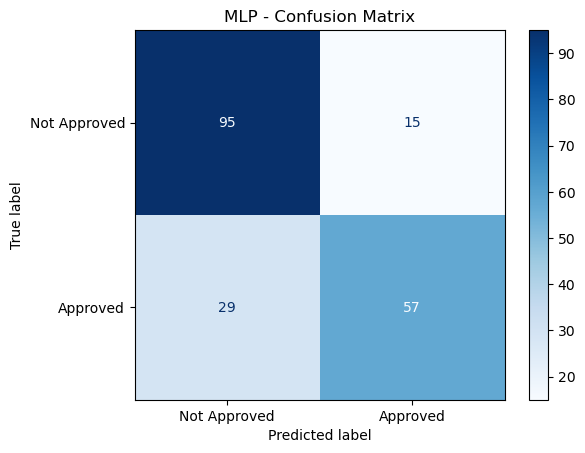

7/7 [==============================] - 0s 366us/step


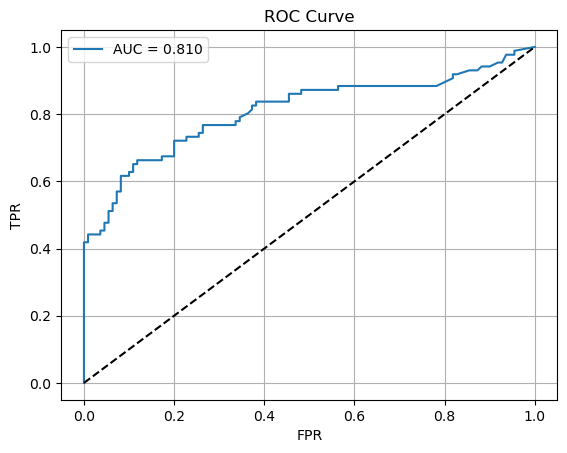

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import AUC
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import RMSprop




# === Use top 3 predictors ===
top3_features = ['A11', 'A15', 'A8']
X = df_encoded[top3_features].values
y = df_encoded["A16 (Class)"].values

# === Train/val split + scaling ===
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# # L2 Regularization
# Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.003))

# # === Build nonlinear model (MLP) ===
# model = Sequential([
#     Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],)),
#     Dense(8, activation='relu'),
#     Dense(1, activation='sigmoid')  # output layer for binary classification
# ])

# model.compile(optimizer=Adam(learning_rate=0.0005),
#               loss=BinaryCrossentropy(),
#               metrics=['accuracy', AUC(name="auc")])

# model.compile(optimizer = RMSprop(learning_rate=0.0005),
#               loss=BinaryCrossentropy(),
#               metrics=['accuracy', AUC(name="auc")])

model = Sequential([
    Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.002),
              loss='binary_crossentropy',
              metrics=['accuracy'])



# === Train the model ===
history = model.fit(X_train_scaled, y_train,
                    validation_data=(X_val_scaled, y_val),
                    epochs=300, batch_size=128, verbose=0)

# === Plot Accuracy and Loss ===
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("MLP Model - Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("MLP Model - Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

# === Confusion Matrix ===
y_pred = (model.predict(X_val_scaled) > 0.5).astype(int)
cm = confusion_matrix(y_val, y_pred)
ConfusionMatrixDisplay(cm, display_labels=["Not Approved", "Approved"]).plot(cmap='Blues')
plt.title("MLP - Confusion Matrix")
plt.grid(False)
plt.show()

# Predictions
y_probs = model.predict(X_val_scaled).flatten()
y_preds = (y_probs > 0.5).astype(int)



# ROC Curve
fpr, tpr, _ = roc_curve(y_val, y_probs)
auc_val = roc_auc_score(y_val, y_probs)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc_val:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.grid(True)
plt.show()


# 5 Features

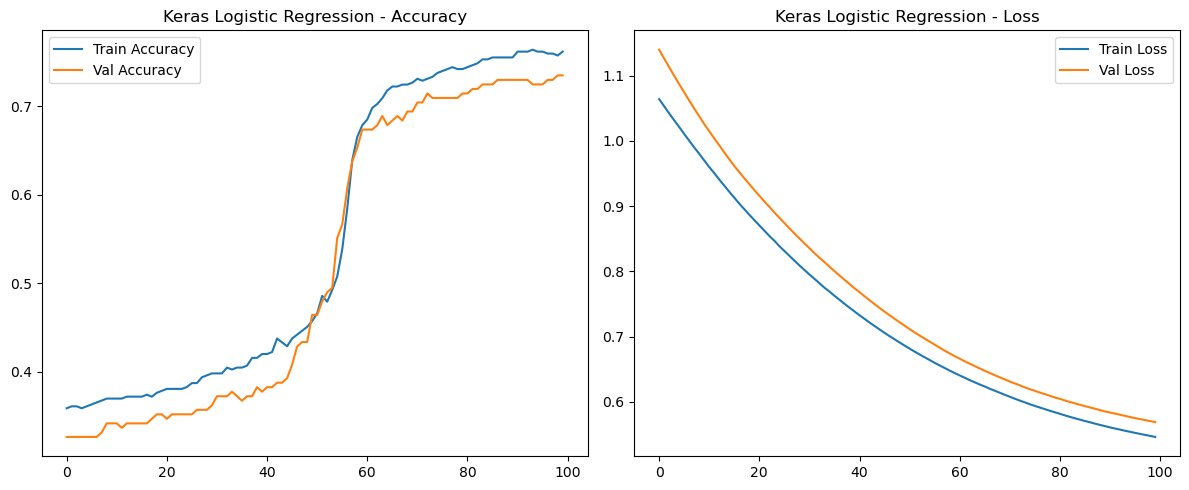

7/7 [==============================] - 0s 430us/step


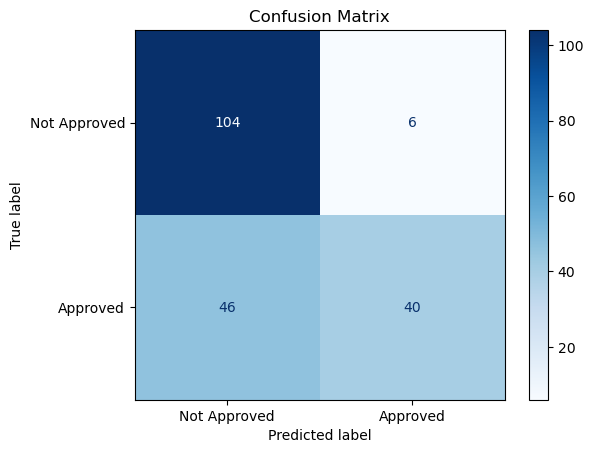

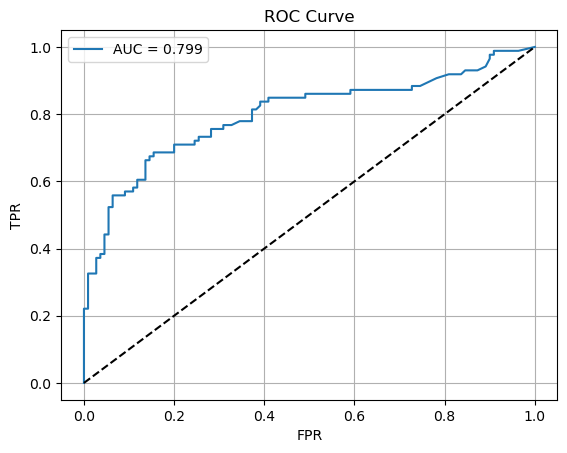

In [105]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import AUC
import matplotlib.pyplot as plt

# Features and target
top5_features = ['A11', 'A15', 'A8', 'A13_p', 'A7_ff']
X = df_encoded[top5_features].values
y = df_encoded["A16 (Class)"].values

# Train/test split and scaling
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Define model
model = Sequential([
    Dense(1, activation='sigmoid', input_shape=(X_train_scaled.shape[1],))
])
model.compile(optimizer=Adam(learning_rate=0.001),
              loss=BinaryCrossentropy(),
              metrics=['accuracy', AUC(name="auc")])

# Train
history = model.fit(X_train_scaled, y_train,
                    validation_data=(X_val_scaled, y_val),
                    epochs=100, batch_size=32, verbose=0)

# Accuracy/Loss Plots
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Keras Logistic Regression - Accuracy")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Keras Logistic Regression - Loss")
plt.legend()
plt.tight_layout()
plt.show()

# Predictions
y_probs = model.predict(X_val_scaled).flatten()
y_preds = (y_probs > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_val, y_preds)
ConfusionMatrixDisplay(cm, display_labels=["Not Approved", "Approved"]).plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_val, y_probs)
auc_val = roc_auc_score(y_val, y_probs)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc_val:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.grid(True)
plt.show()


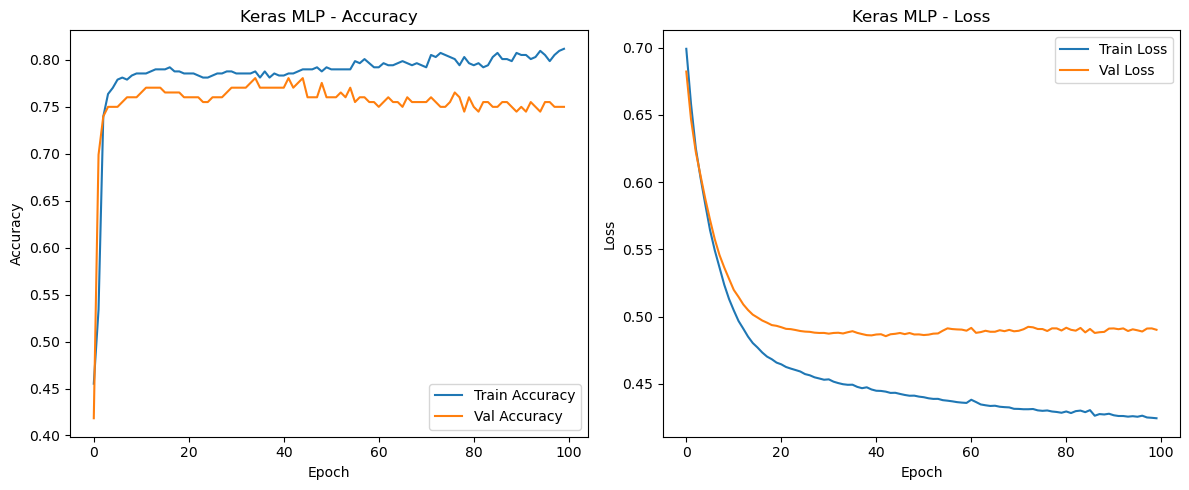

7/7 [==============================] - 0s 602us/step


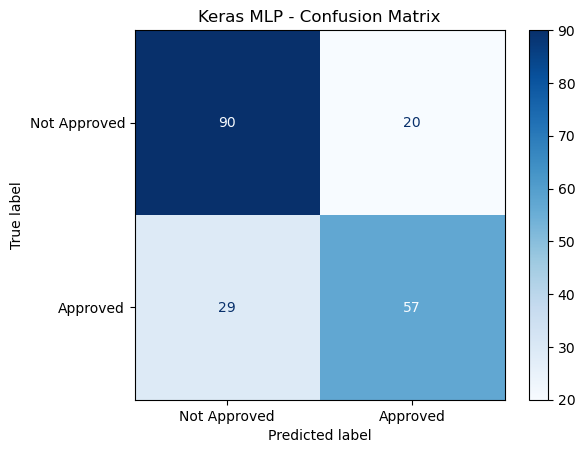

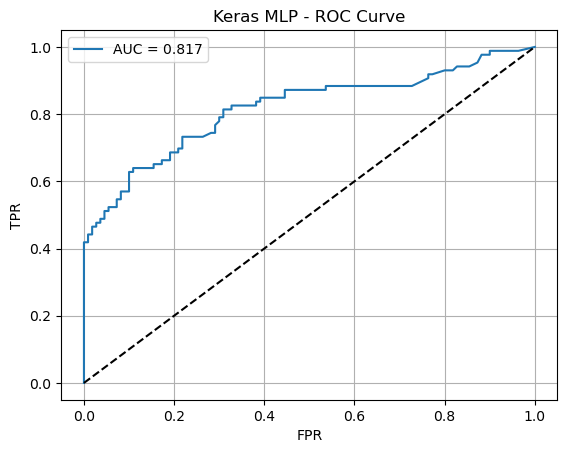

In [108]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import AUC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Features and target
top5_features = ['A11', 'A15', 'A8', 'A13_p', 'A7_ff']
X = df_encoded[top5_features].values
y = df_encoded["A16 (Class)"].values

# Train/test split and scaling
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Define MLP model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer=Adam(learning_rate=0.001),
              loss=BinaryCrossentropy(),
              metrics=['accuracy', AUC(name="auc")])

# Train model
history = model.fit(X_train_scaled, y_train,
                    validation_data=(X_val_scaled, y_val),
                    epochs=100, batch_size=32, verbose=0)

# Plot accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Keras MLP - Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Keras MLP - Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.tight_layout()
plt.show()

# Predict
y_probs = model.predict(X_val_scaled).flatten()
y_preds = (y_probs > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_val, y_preds)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Approved", "Approved"]).plot(cmap='Blues')
plt.title("Keras MLP - Confusion Matrix")
plt.grid(False)
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_val, y_probs)
auc_val = roc_auc_score(y_val, y_probs)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc_val:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Keras MLP - ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.grid(True)
plt.show()


In [109]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

def plot_pca_classification(model, X_val_scaled, y_probs, title):
    # PCA to 2D
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_val_scaled)

    # Create meshgrid in PCA space
    x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
    y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    grid_pca = np.c_[xx.ravel(), yy.ravel()]
    grid_original = pca.inverse_transform(grid_pca)

    # Predict on grid
    Z = model.predict(grid_original, verbose=0).reshape(xx.shape)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, levels=100, cmap='coolwarm', alpha=0.6)
    plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)  # decision boundary
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_probs, cmap='coolwarm', s=50, edgecolor='k')
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.title(title)
    cbar = plt.colorbar()
    cbar.set_label("Predicted Approval Probability")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


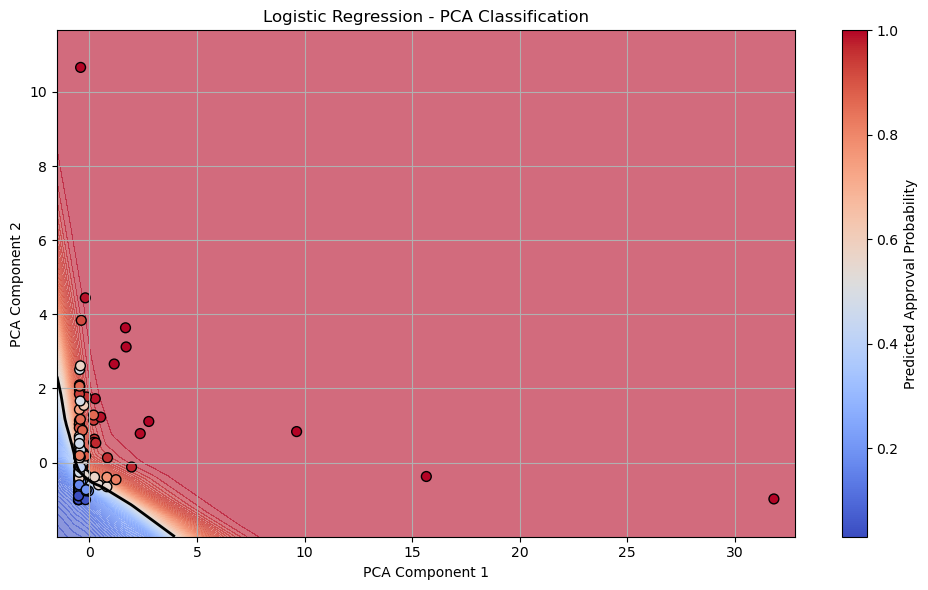

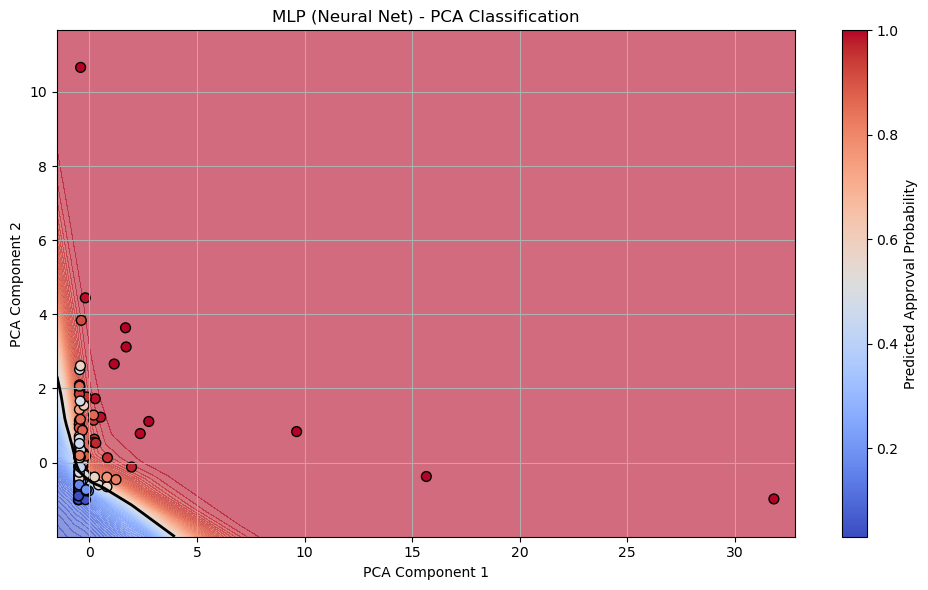

In [110]:
# Logistic Regression
y_probs_logreg = model.predict(X_val_scaled, verbose=0).flatten()
plot_pca_classification(model, X_val_scaled, y_probs_logreg, 
                        "Logistic Regression - PCA Classification")

# MLP
y_probs_mlp = model.predict(X_val_scaled, verbose=0).flatten()
plot_pca_classification(model, X_val_scaled, y_probs_mlp,
                        "MLP (Neural Net) - PCA Classification")


In [111]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def plot_3d_pca_classification(model, X_val_scaled, y_probs, title):
    # 3D PCA projection
    pca = PCA(n_components=3)
    X_pca = pca.fit_transform(X_val_scaled)

    # Plot
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(
        X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
        c=y_probs, cmap='coolwarm', s=50, alpha=0.75, edgecolor='k'
    )
    ax.set_xlabel("PCA Component 1")
    ax.set_ylabel("PCA Component 2")
    ax.set_zlabel("PCA Component 3")
    ax.set_title(title)
    cbar = fig.colorbar(scatter, ax=ax, shrink=0.5)
    cbar.set_label("Predicted Approval Probability")
    plt.tight_layout()
    plt.show()


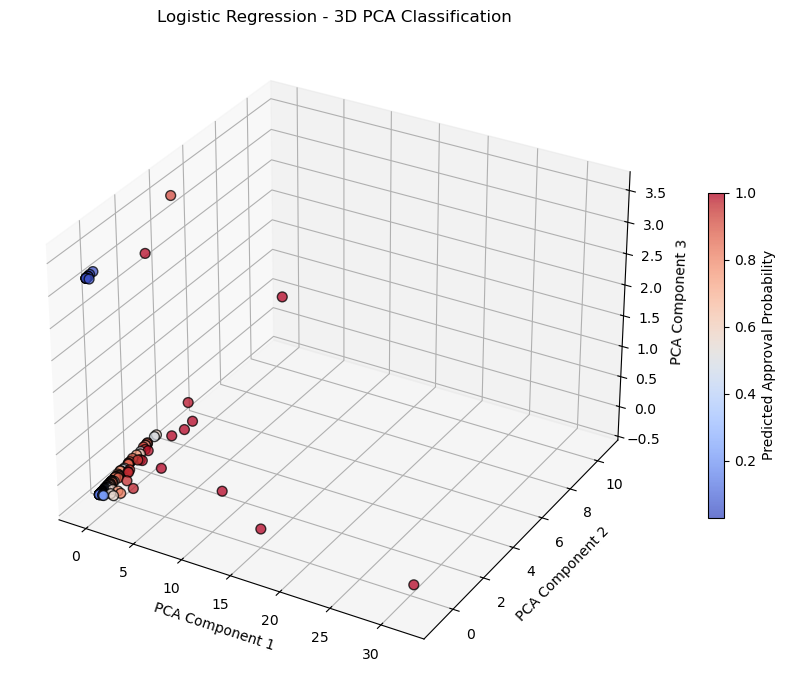

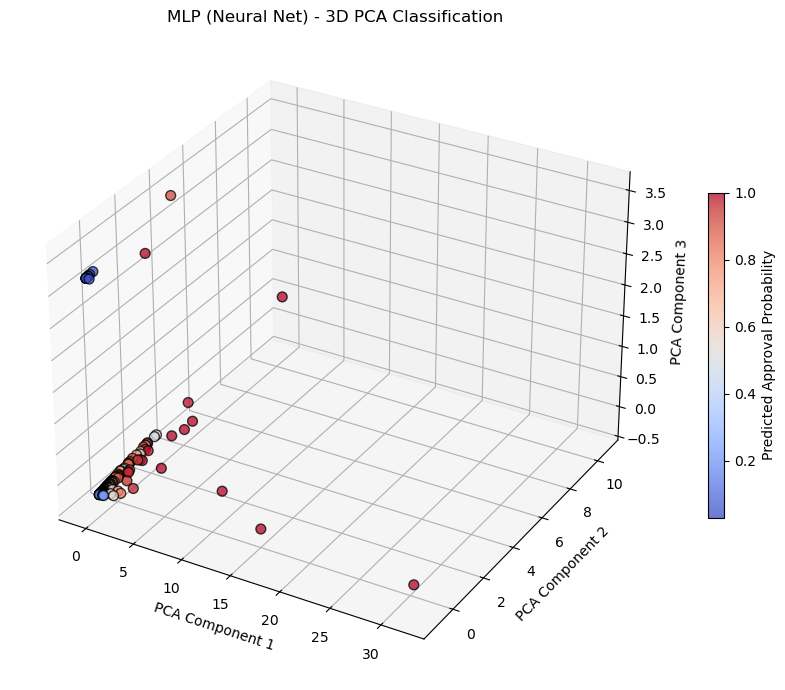

In [112]:
# Logistic Regression
y_probs_logreg = model.predict(X_val_scaled, verbose=0).flatten()
plot_3d_pca_classification(model, X_val_scaled, y_probs_logreg, 
                           "Logistic Regression - 3D PCA Classification")

# MLP
y_probs_mlp = model.predict(X_val_scaled, verbose=0).flatten()
plot_3d_pca_classification(model, X_val_scaled, y_probs_mlp,
                           "MLP (Neural Net) - 3D PCA Classification")


# Dropout (removed) + L2 to MLP

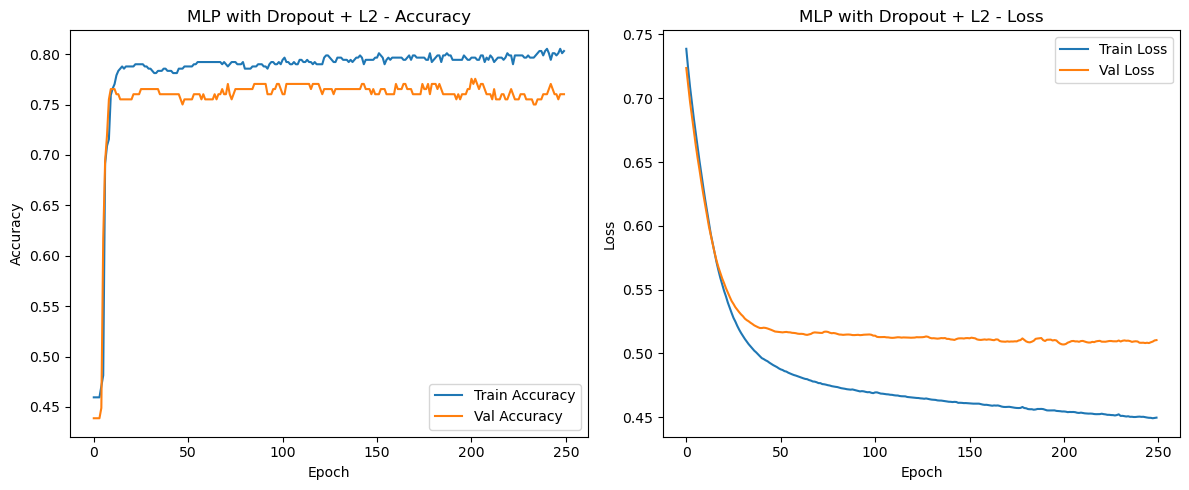

7/7 [==============================] - 0s 638us/step


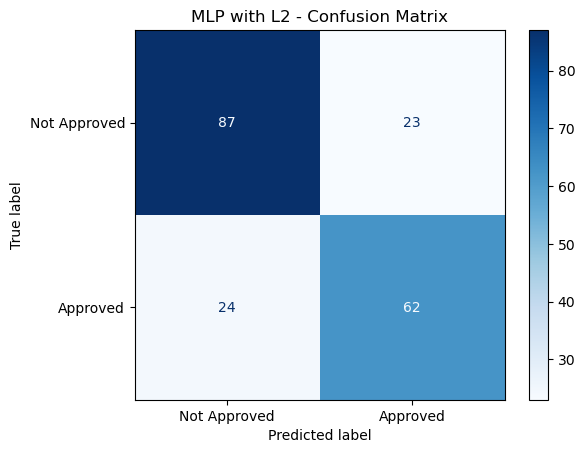

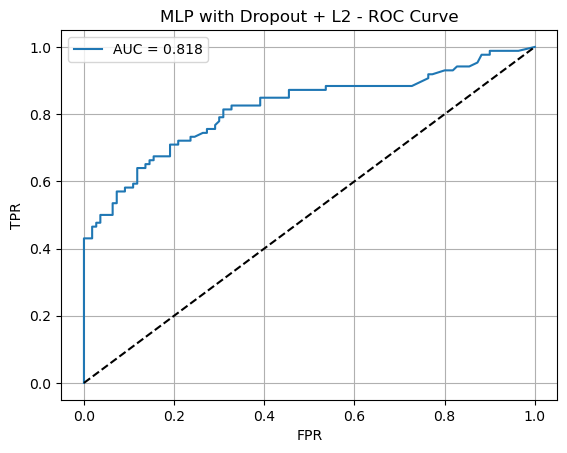

In [124]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import AUC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Features and target
top5_features = ['A11', 'A15', 'A8', 'A13_p', 'A7_ff']
X = df_encoded[top5_features].values
y = df_encoded["A16 (Class)"].values

# Train/test split and scaling
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Build the model
model = Sequential([
    Dense(32, activation='relu', kernel_regularizer=l2(0.001), input_shape=(X_train_scaled.shape[1],)),
    Dense(16, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.0005),
              loss=BinaryCrossentropy(),
              metrics=['accuracy', AUC(name='auc')])

# Train the model
history = model.fit(X_train_scaled, y_train,
                    validation_data=(X_val_scaled, y_val),
                    epochs=250, batch_size=64, verbose=0)

# Plot accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("MLP with Dropout + L2 - Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("MLP with Dropout + L2 - Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate predictions
y_probs = model.predict(X_val_scaled).flatten()
y_preds = (y_probs > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_val, y_preds)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Approved", "Approved"]).plot(cmap='Blues')
plt.title("MLP with L2 - Confusion Matrix")
plt.grid(False)
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_val, y_probs)
auc_val = roc_auc_score(y_val, y_probs)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc_val:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("MLP with Dropout + L2 - ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.grid(True)
plt.show()


# XGBoost

✅ XGBoost Test Accuracy (Top 5): 0.7704
✅ XGBoost Train Accuracy (Top 5): 0.9431
🎯 XGBoost AUC (Top 5): 0.8208


/opt/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [23:24:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


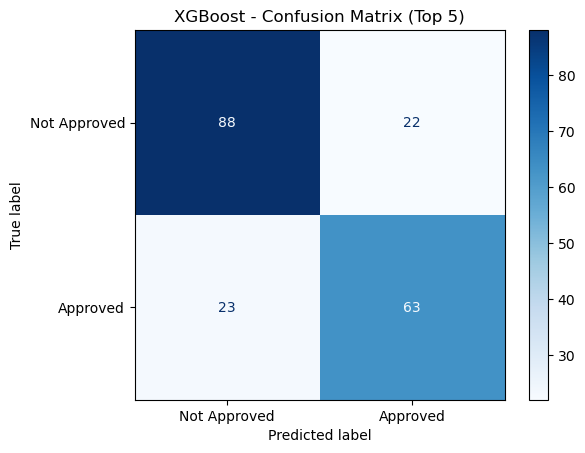

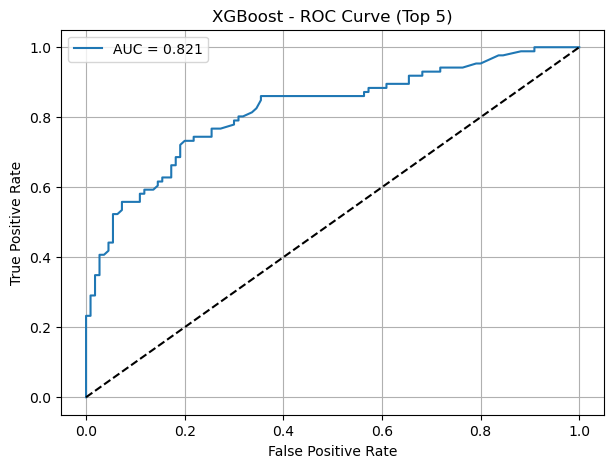

In [160]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve

# Prepare data for XGBoost
X = df_encoded[top5_features].values
y = df_encoded["A16 (Class)"].values
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X, y,
                                            test_size=0.3, random_state=42)

# Train XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                              random_state=42)
xgb_model.fit(X_train_xgb, y_train_xgb)


# Predictions
y_pred_xgb = xgb_model.predict(X_test_xgb)
y_probs_xgb = xgb_model.predict_proba(X_test_xgb)[:, 1]
y_train_pred = xgb_model.predict(X_train_xgb)


# Metrics
acc_xgb = accuracy_score(y_test_xgb, y_pred_xgb)
train_acc = accuracy_score(y_train_xgb, y_train_pred)
auc_xgb = roc_auc_score(y_test_xgb, y_probs_xgb)

# Print results
print(f"✅ XGBoost Test Accuracy (Top 5): {acc_xgb:.4f}")
print(f"✅ XGBoost Train Accuracy (Top 5): {train_acc:.4f}")
print(f"🎯 XGBoost AUC (Top 5): {auc_xgb:.4f}")

# Confusion Matrix
cm_xgb = confusion_matrix(y_test_xgb, y_pred_xgb)
ConfusionMatrixDisplay(cm_xgb, display_labels=["Not Approved", 
                                "Approved"]).plot(cmap='Blues')

plt.title("XGBoost - Confusion Matrix (Top 5)")
plt.grid(False)
plt.show()

# ROC Curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test_xgb, y_probs_xgb)
plt.figure(figsize=(7, 5))
plt.plot(fpr_xgb, tpr_xgb, label=f"AUC = {auc_xgb:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("XGBoost - ROC Curve (Top 5)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


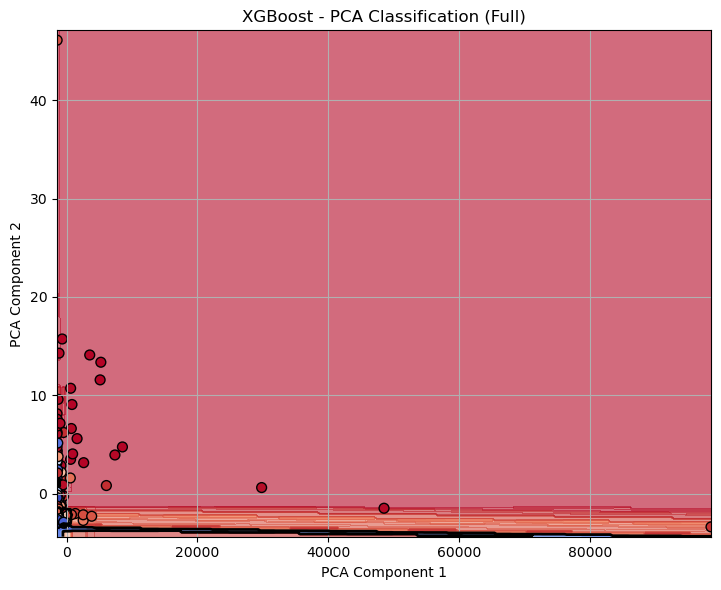

In [133]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# === 2D PCA Projection of Test Set ===
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test_xgb)

# === Create meshgrid in PCA space ===
x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# === Inverse transform PCA space back to original feature space ===
grid_pca = np.c_[xx.ravel(), yy.ravel()]
grid_original = pca.inverse_transform(grid_pca)

# === Predict on the grid using XGBoost ===
Z = xgb_model.predict_proba(grid_original)[:, 1]
Z = Z.reshape(xx.shape)

# === Plot ===
# Full PCA 2D mesh + predictions
plt.figure(figsize=(14, 6))

# --- Full view ---
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z, levels=100, cmap='coolwarm', alpha=0.6)
plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_probs_xgb, cmap='coolwarm', 
            s=50, edgecolor='k')

plt.title("XGBoost - PCA Classification (Full)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)

plt.tight_layout()
plt.show()


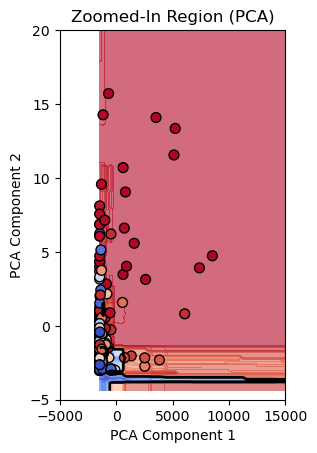

In [147]:
# --- Zoomed-in view ---
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z, levels=100, cmap='coolwarm', alpha=0.6)
plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_probs_xgb, cmap='coolwarm',
            s=50, edgecolor='k')
plt.title("Zoomed-In Region (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

# 👇 Adjust zoomed-in bounds manually (you can refine based on where 15,000 and 20 landed in PCA)
plt.xlim(-5000, 15000)
plt.ylim(-5, 20)
plt.show()

# Less Over-fitted version of XGBoost (using early stopping)

/opt/anaconda3/lib/python3.10/site-packages/xgboost/callback.py:386: UserWarning: [00:05:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


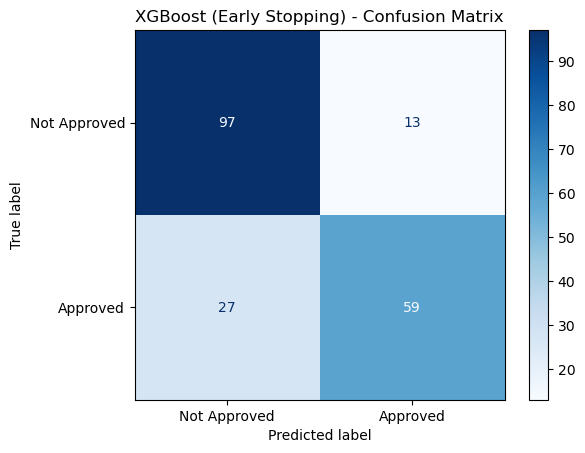

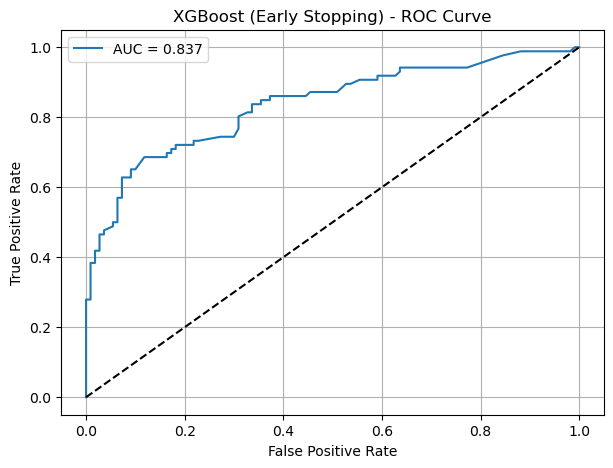

✅ XGBoost Accuracy (with Early Stopping): 0.7959
🎯 XGBoost AUC (with Early Stopping): 0.8367
🎓 XGBoost Training Accuracy: 0.8446


In [188]:
from sklearn.metrics import accuracy_score
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define evals_result as an empty dict
evals_result = {}

# Full working XGBoost model with early stopping using version 3.0.0
xgb_model_es = xgb.XGBClassifier(
    max_depth=4,
    learning_rate=0.05,
    n_estimators=500,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    early_stopping_rounds=20,
    eval_metric=["logloss", "error"],
    callbacks=[],
    random_state=42
)

# Fit with early stopping
evals_result = {}
xgb_model_es.fit(
    X_train_xgb,
    y_train_xgb,
    eval_set = [(X_train_xgb, y_train_xgb), (X_test_xgb, y_test_xgb)],
    verbose=False,   
)

# # ✅ Now retrieve the result like this:
# evals_result = xgb_model.evals_result()

# Predictions
y_pred_es = xgb_model_es.predict(X_test_xgb)
y_probs_es = xgb_model_es.predict_proba(X_test_xgb)[:, 1]

# Evaluation metrics
acc_es = accuracy_score(y_test_xgb, y_pred_es)
auc_es = roc_auc_score(y_test_xgb, y_probs_es)

# Confusion Matrix
cm_es = confusion_matrix(y_test_xgb, y_pred_es)
ConfusionMatrixDisplay(cm_es, display_labels=["Not Approved",
                            "Approved"]).plot(cmap='Blues')

plt.title("XGBoost (Early Stopping) - Confusion Matrix")
plt.grid(False)
plt.show()

# ROC Curve
fpr_es, tpr_es, _ = roc_curve(y_test_xgb, y_probs_es)
plt.figure(figsize=(7, 5))
plt.plot(fpr_es, tpr_es, label=f"AUC = {auc_es:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("XGBoost (Early Stopping) - ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

# Print accuracy and AUC
print(f"✅ XGBoost Accuracy (with Early Stopping): {acc_es:.4f}")
print(f"🎯 XGBoost AUC (with Early Stopping): {auc_es:.4f}")


# Predict on training set
y_train_pred = xgb_model_es.predict(X_train_xgb)

# Calculate training accuracy
train_acc = accuracy_score(y_train_xgb, y_train_pred)
print(f"🎓 XGBoost Training Accuracy: {train_acc:.4f}")


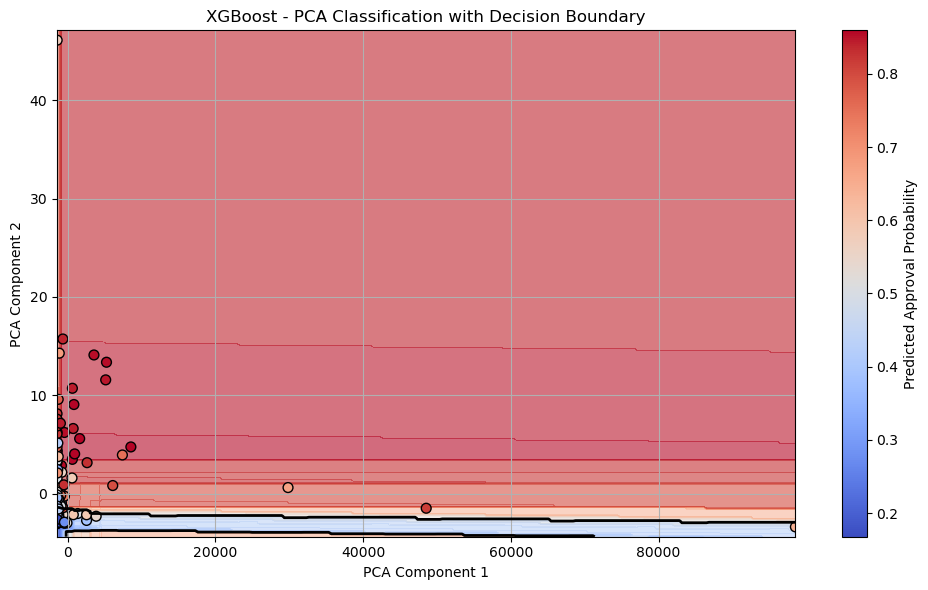

In [189]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Step 1: PCA Projection of Test Set
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test_xgb)

# Step 2: Create a grid in PCA space
x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

grid_pca = np.c_[xx.ravel(), yy.ravel()]
grid_original = pca.inverse_transform(grid_pca)

# Step 3: Predict on grid using trained XGBoost model
Z = xgb_model_es.predict_proba(grid_original)[:, 1]
Z = Z.reshape(xx.shape)

# Step 4: Predict on test set to get coloring
y_probs_test = xgb_model_es.predict_proba(X_test_xgb)[:, 1]

# Step 5: Plot
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, levels=100, cmap='coolwarm', alpha=0.6)
plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_probs_test, 
            cmap='coolwarm', s=50, edgecolor='k')

plt.title("XGBoost - PCA Classification with Decision Boundary")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
cbar = plt.colorbar()
cbar.set_label("Predicted Approval Probability")
plt.grid(True)
plt.tight_layout()
plt.show()


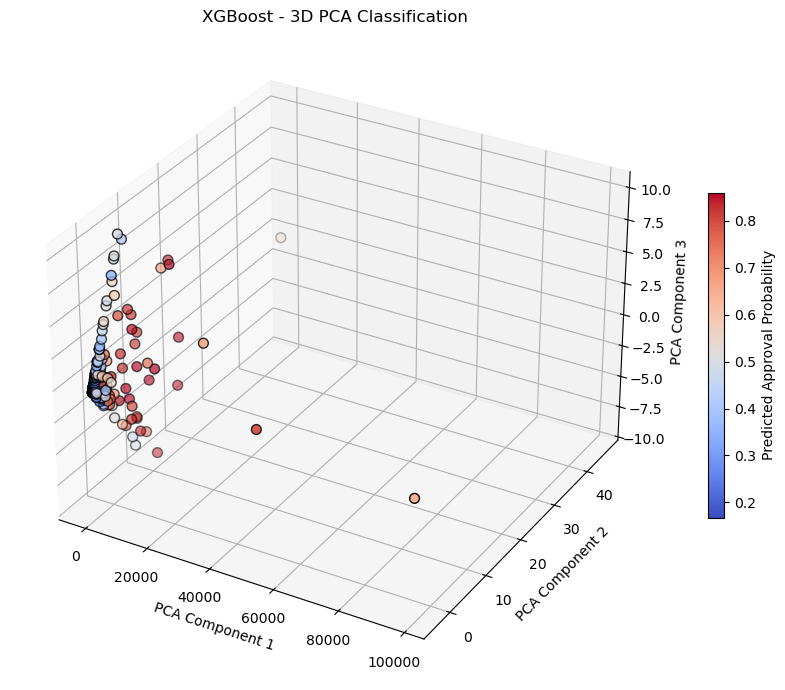

In [190]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# 3D PCA Projection of Test Set
pca_3d = PCA(n_components=3)
X_test_pca_3d = pca_3d.fit_transform(X_test_xgb)

# Predicted probabilities for coloring
y_probs_test_3d = xgb_model_es.predict_proba(X_test_xgb)[:, 1]

# Plot 3D PCA Classification
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    X_test_pca_3d[:, 0], X_test_pca_3d[:, 1], X_test_pca_3d[:, 2],
    c=y_probs_test_3d, cmap='coolwarm', s=50, edgecolor='k'
)
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
ax.set_title("XGBoost - 3D PCA Classification")
cbar = fig.colorbar(scatter, ax=ax, shrink=0.5)
cbar.set_label("Predicted Approval Probability")
plt.tight_layout()
plt.show()



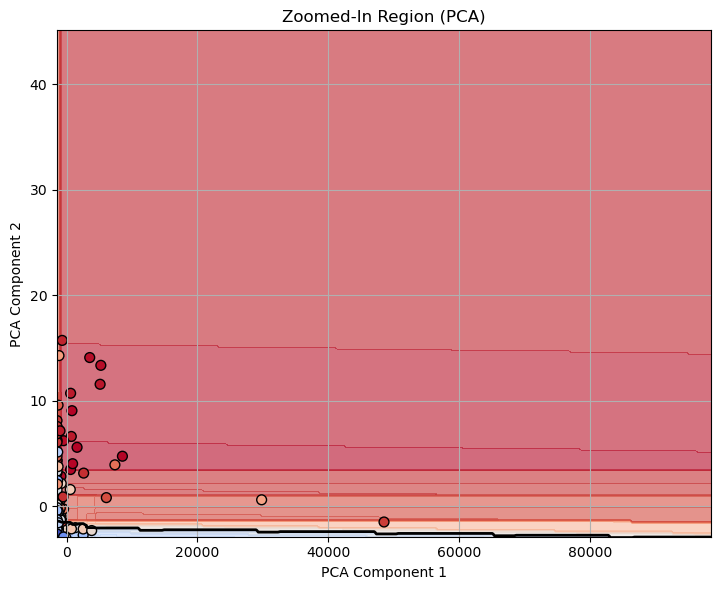

In [191]:

# 2D PCA and Grid for Side-by-Side Zoom
pca_2d = PCA(n_components=2)
X_test_pca = pca_2d.fit_transform(X_test_xgb)

# Create grid
x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
grid_pca = np.c_[xx.ravel(), yy.ravel()]
grid_original = pca_2d.inverse_transform(grid_pca)
Z = xgb_model_es.predict_proba(grid_original)[:, 1].reshape(xx.shape)

# Side-by-side plots
plt.figure(figsize=(14, 6))


# Zoomed-in view
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z, levels=100, cmap='coolwarm', alpha=0.6)
plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_probs_test_3d,
            cmap='coolwarm', s=50, edgecolor='k')

plt.title("Zoomed-In Region (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.xlim(X_test_pca[:, 0].min() + 1.5, X_test_pca[:, 0].max() - 2)
plt.ylim(X_test_pca[:, 1].min() + 0.5, X_test_pca[:, 1].max() - 1)
plt.grid(True)

plt.tight_layout()
plt.show()


In [192]:
# Step 1: Convert data to DMatrix
dtrain = xgb.DMatrix(X_train_xgb, label=y_train_xgb)
dtest = xgb.DMatrix(X_test_xgb, label=y_test_xgb)

# Step 2: Define parameters
params = {
    'max_depth': 4,
    'eta': 0.05,
    'objective': 'binary:logistic',
    'eval_metric': ['logloss', 'error'],
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

# Step 3: Train the model with evaluation tracking
evals_result = {}
watchlist = [(dtrain, 'train'), (dtest, 'eval')]

xgb_booster = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=200,
    evals=watchlist,
    early_stopping_rounds=20,
    evals_result=evals_result,
    verbose_eval=False
)

# Step 4: Return the evaluation keys and preview structure
keys = evals_result.keys()
metrics = {key: list(evals_result[key].keys()) for key in evals_result}
(keys, metrics)


(dict_keys(['train', 'eval']),
 {'train': ['logloss', 'error'], 'eval': ['logloss', 'error']})

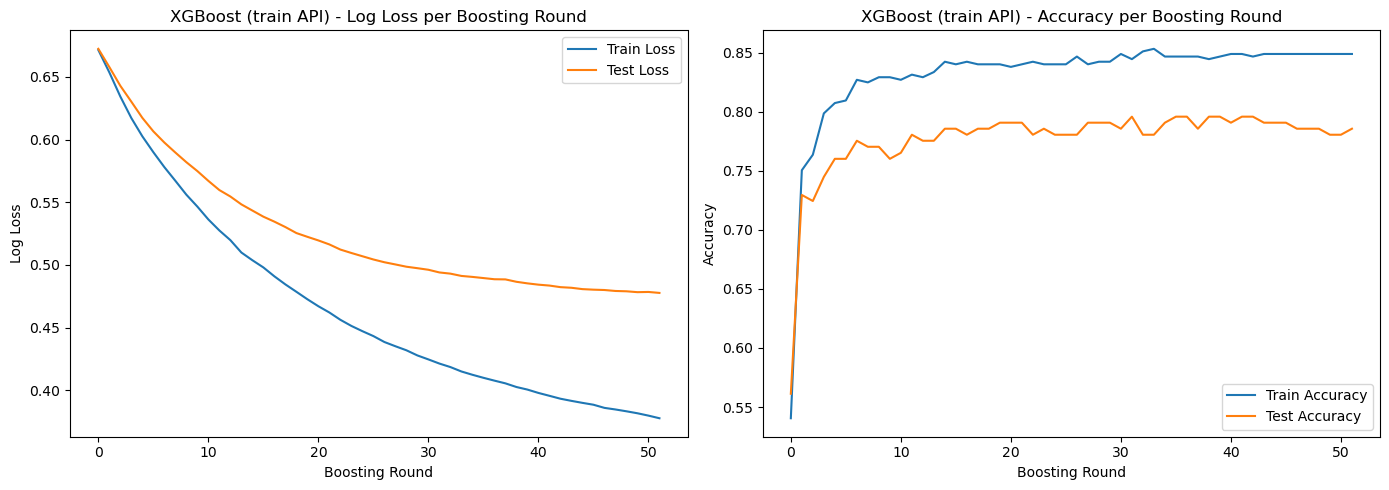

In [193]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(14, 5))

# Log loss
plt.subplot(1, 2, 1)
plt.plot(evals_result['train']['logloss'], label='Train Loss')
plt.plot(evals_result['eval']['logloss'], label='Test Loss')
plt.title('XGBoost (train API) - Log Loss per Boosting Round')
plt.xlabel('Boosting Round')
plt.ylabel('Log Loss')
plt.legend()

# Accuracy = 1 - error
plt.subplot(1, 2, 2)
plt.plot(1 - np.array(evals_result['train']['error']), label='Train Accuracy')
plt.plot(1 - np.array(evals_result['eval']['error']), label='Test Accuracy')
plt.title('XGBoost (train API) - Accuracy per Boosting Round')
plt.xlabel('Boosting Round')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [178]:
print(evals_result.keys())
for key in evals_result:
    print(f"{key}: {list(evals_result[key].keys())}")


dict_keys([])
